## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [28]:
def plotting(loss, thetas0, thetas1, data, target):
    
    plt.plot(loss, '.-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas0, loss, '.-')
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas1, loss, '.-')
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(data, target, '.-')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [29]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [30]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

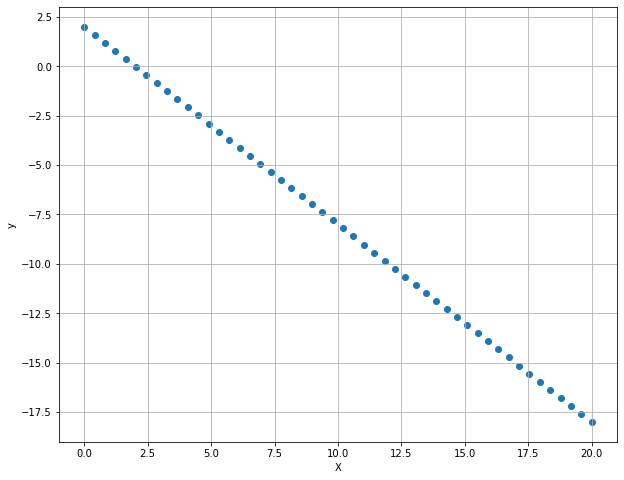

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [11]:
def adaGrad(X, y, alpha, itr, epsilon):
    
    th0 = th1 = v0 = v1 =0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    
    for i in range(itr):
        
        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e)
        
        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X)

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or norm < threshold):
            break

        else:
            v0 = v0 + j_theta_0**2
            th0 = th0 - (alpha/math.sqrt(v0) + epsilon) * j_theta_0
            
            v1 = v1 + j_theta_1**2
            th1 = th1 - (alpha/math.sqrt(v1) + epsilon) * j_theta_1
    
    print("******* Training Report *********\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('Cost=',j,'\n')
    print('Gradient Vector',gradient_vec,'\n')
    print('Gradient Vector Norm:',norm,'\n')
    print(f'Optimal theta_0: {th0}\noptimal theta_1: {th1}')
            
    return th0, th1, h, thetas_0, thetas_1, loss
            

In [12]:
th0, th1, h, thetas_0, thetas_1, loss = adaGrad(X, y, alpha=0.05, itr=500, epsilon=0.00000001)

******* Training Report *********

Gradient Descent converged after 266 iterations

cost= 0.893934836613027 

Gradient Vector [[-0.4723556 ]
 [ 2.64443157]] 

Gradient Vector Norm: 2.6862870541333472 

optimal theta_0: -0.5960696475292786
optimal theta_1: -0.7876285948152223


In [14]:
y_pred= th0 + th1*X

print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.9484672858893667


r2 score =  0.9484638125790851


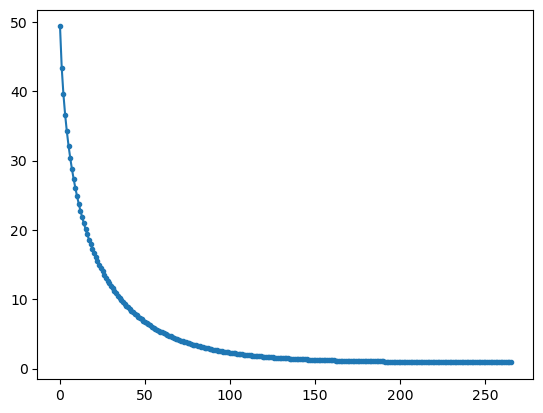

In [16]:
plt.plot(loss, '.-')

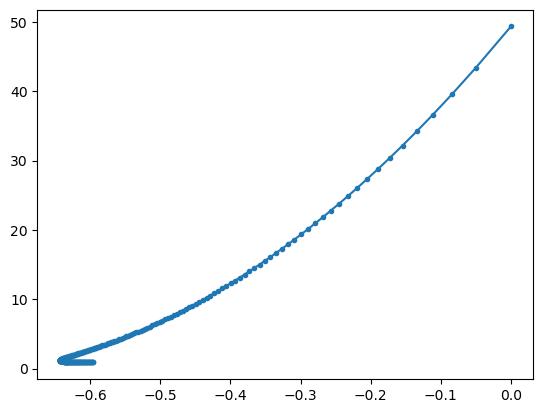

In [17]:
plt.plot(thetas_0, loss, '.-')

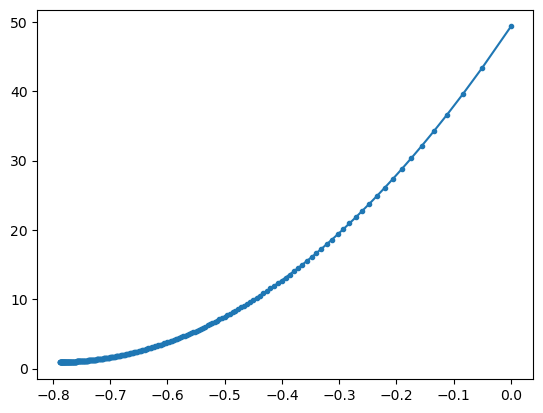

In [18]:
plt.plot(thetas_1, loss, '.-')

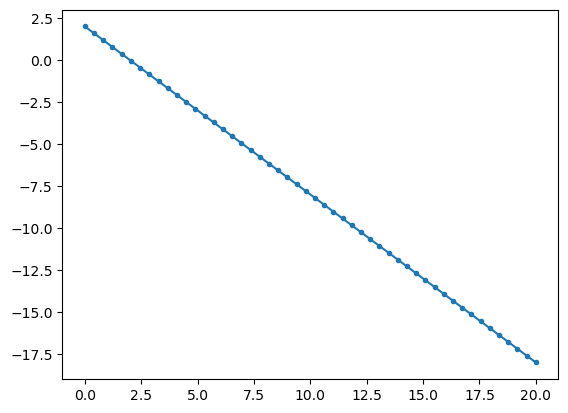

In [21]:
plt.plot(X, y, '.-')

## Guide Answer

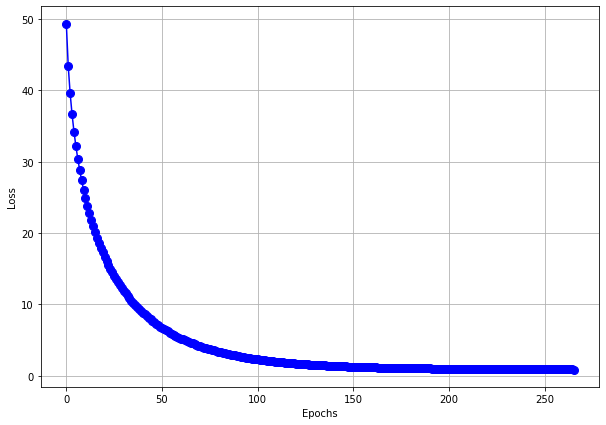

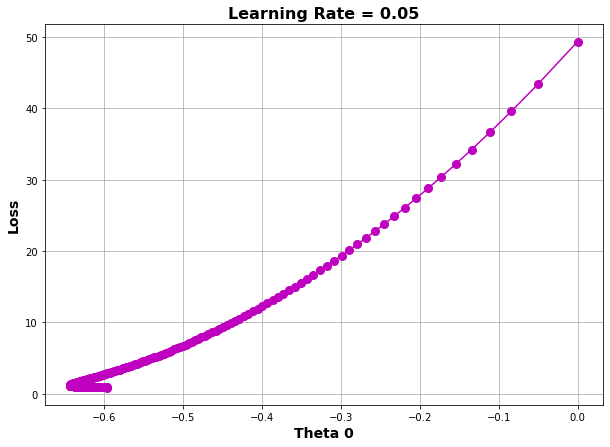

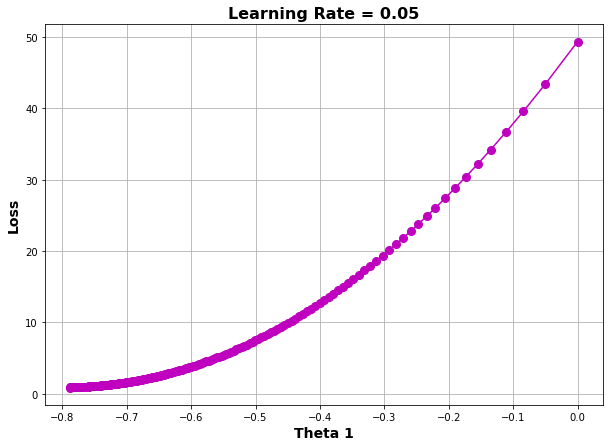

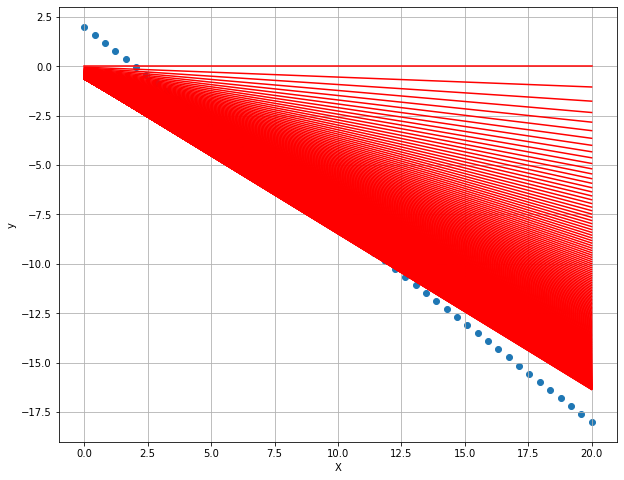

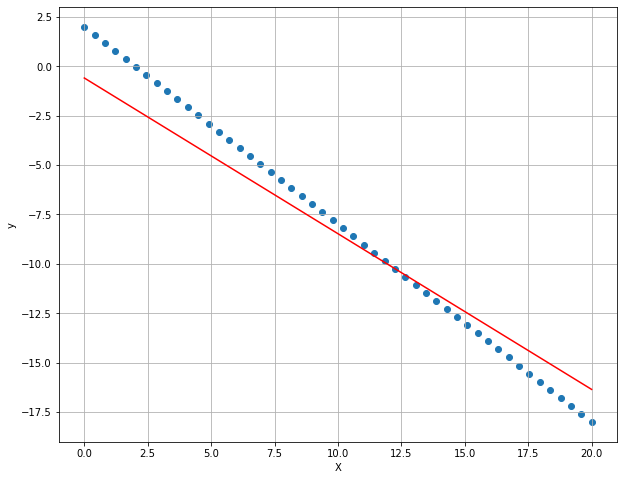

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [23]:
th0, th1, h, thetas_0, thetas_1, loss = adaGrad(X, y, alpha=0.005, itr=5000, epsilon=0.00000001)

******* Training Report *********

Gradient Descent converged after 5000 iterations

cost= 4.96994442053323 

Gradient Vector [[ 1.82515465]
 [33.3935875 ]] 

Gradient Vector Norm: 33.44342798629986 

optimal theta_0: -0.539349310508981
optimal theta_1: -0.5635927057864458


In [24]:
from sklearn.metrics import r2_score
y_pred= th0 + th1*X

print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.7135773792872017


r2 score =  0.7095974929894115


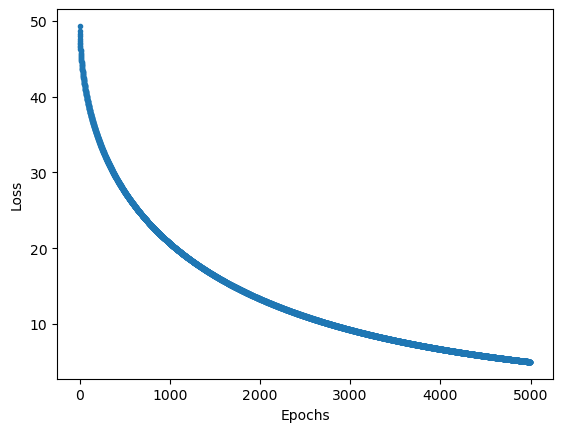

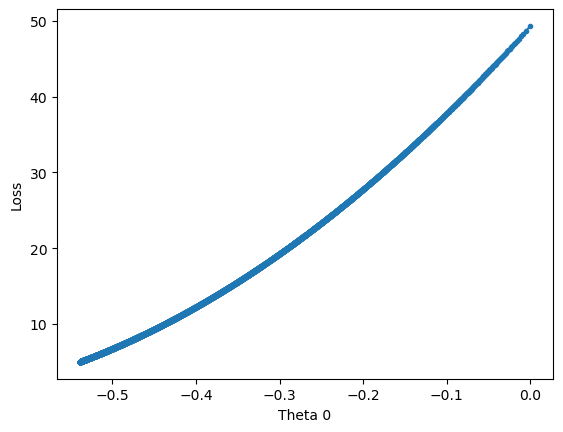

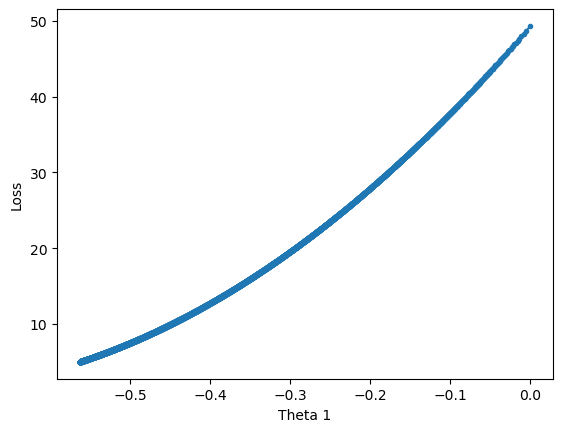

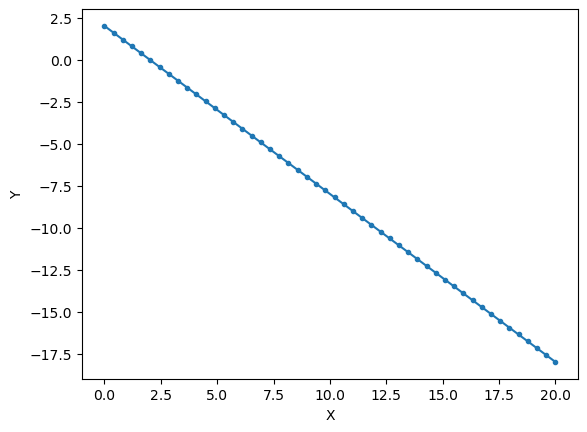

In [27]:
plotting(loss, thetas_0, thetas_1, data=X, target=y)

## Guide Answerfrom sklearn.metrics import r2_score


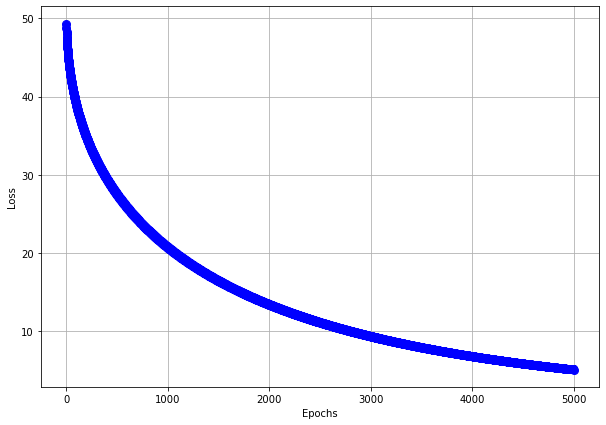

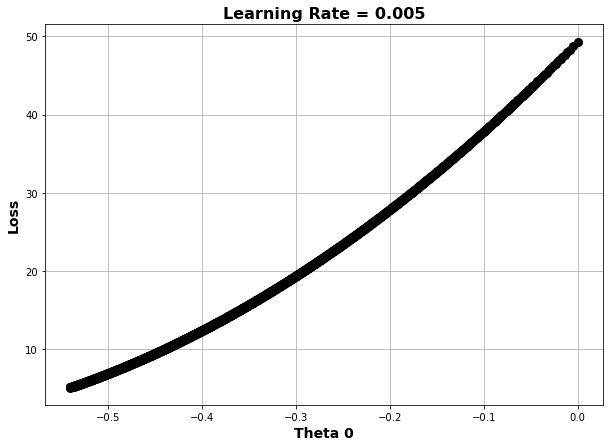

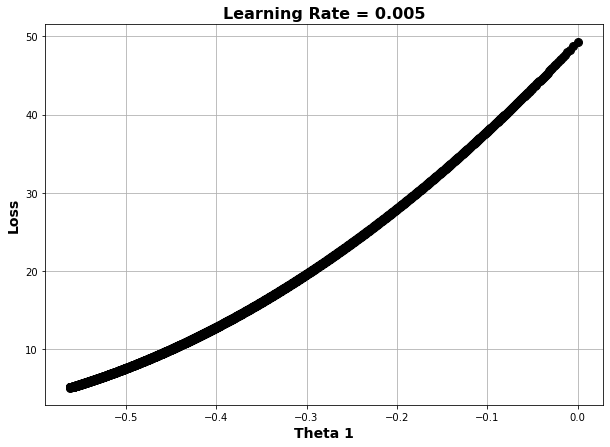

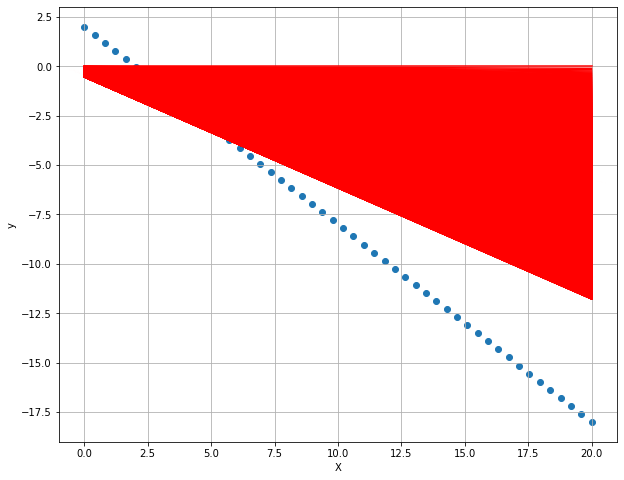

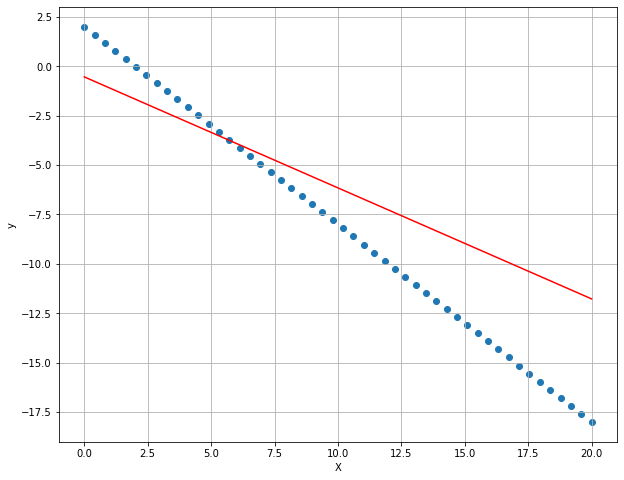

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [28]:
th0, th1, h, thetas_0, thetas_1, loss = adaGrad(X, y, alpha=0.0005, itr=5000, epsilon=0.00000001)

******* Training Report *********

Gradient Descent converged after 3795 iterations

cost= 41.82825806428883 

Gradient Vector [[  7.29857837]
 [105.45503409]] 

Gradient Vector Norm: 105.70730089204415 

optimal theta_0: -0.060205569538703416
optimal theta_1: -0.06412160611257686


In [29]:
y_pred= th0 + th1*X

print("r2 score = ", r2_score(y,y_pred))

r2 score =  -1.4112760531178261


r2 score =  -1.4736441832884104


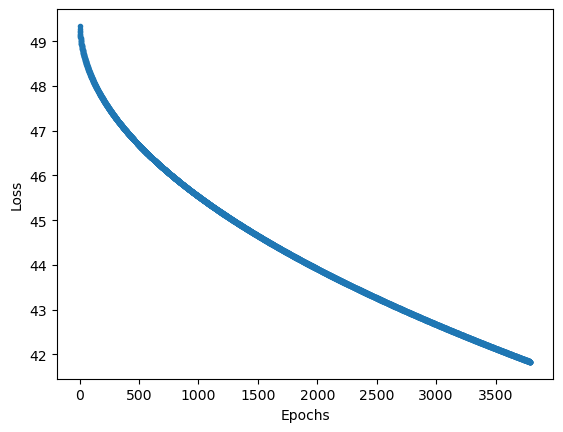

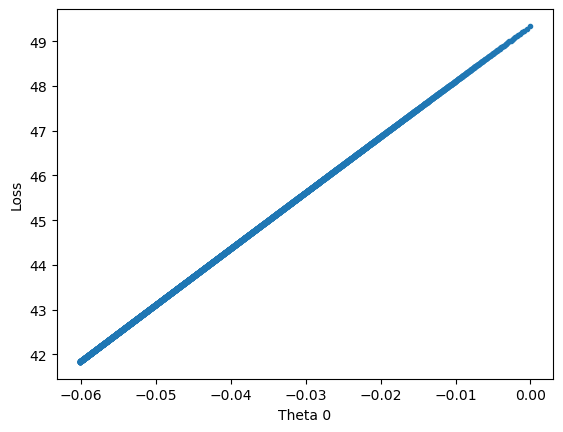

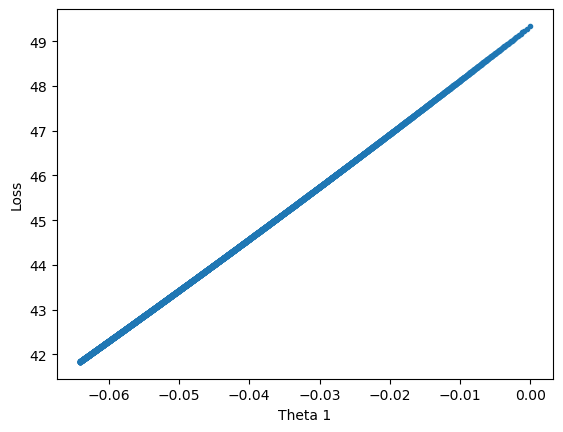

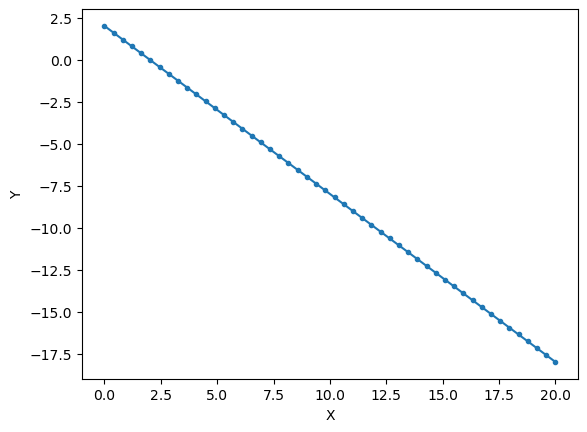

In [30]:
plotting(loss, thetas_0, thetas_1, X, y)

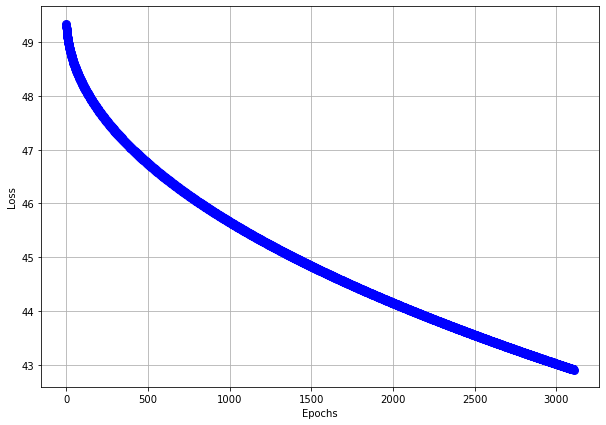

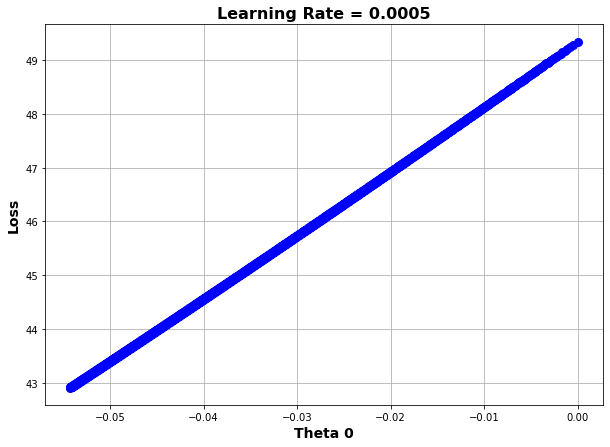

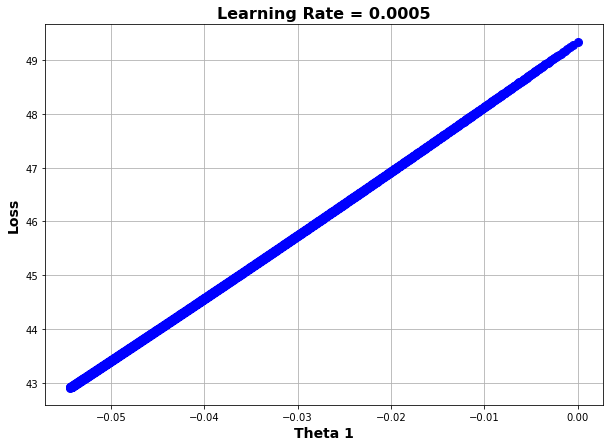

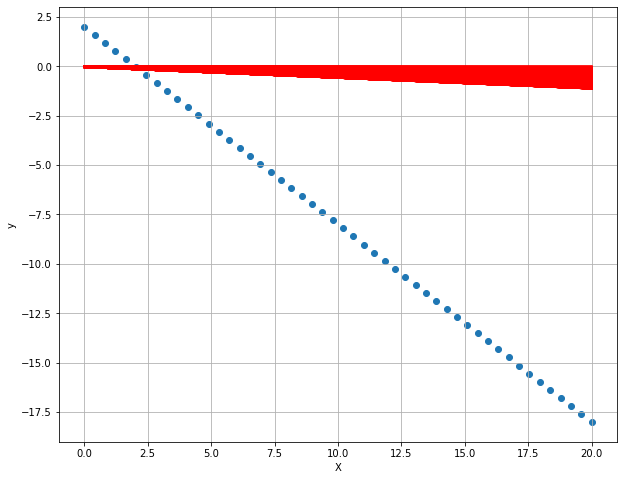

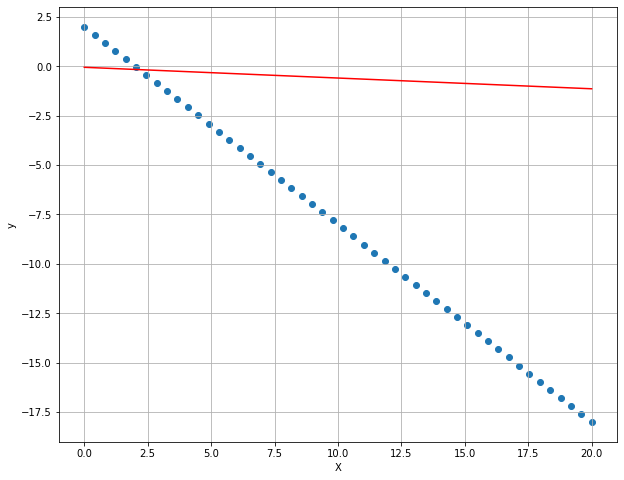

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [7]:
def rmsProp(X, y, alpha, itr, epsilon, beta):
    
    th0 = th1 = v0 = v1 =0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    
    for i in range(itr):
        
        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e)
        
        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X)

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or norm < threshold):
            break

        else:
            v0 =  beta*v0 + (1-beta)*(j_theta_0**2)
            th0 = th0 - (alpha/math.sqrt(v0) + epsilon) * j_theta_0
            
            v1 = beta*v1 + (1-beta)*(j_theta_1**2)
            th1 = th1 - (alpha/math.sqrt(v1) + epsilon) * j_theta_1
    
    print("******* Training Report *********\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('Cost=',j,'\n')
    print('Gradient Vector',gradient_vec,'\n')
    print('Gradient Vector Norm:',norm,'\n')
    print(f'Optimal theta_0: {th0}\noptimal theta_1: {th1}')
            
    return th0, th1, h, thetas_0, thetas_1, loss
            

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [8]:
th0, th1, h, thetas_0, thetas_1, loss = rmsProp(X, y, alpha = 0.05, itr=500, epsilon=0.00000001, beta=0.9)

******* Training Report *********

Gradient Descent converged after 99 iterations

Cost= 0.011568399570452245 

Gradient Vector [[-0.04681226]
 [ 0.38433119]] 

Gradient Vector Norm: 0.3871716014409392 

Optimal theta_0: 1.7074804564135728
optimal theta_1: -0.9754292720462724


In [10]:
y_pred= th0 + th1*X

print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.999333115789468


r2 score =  0.9993328514667263


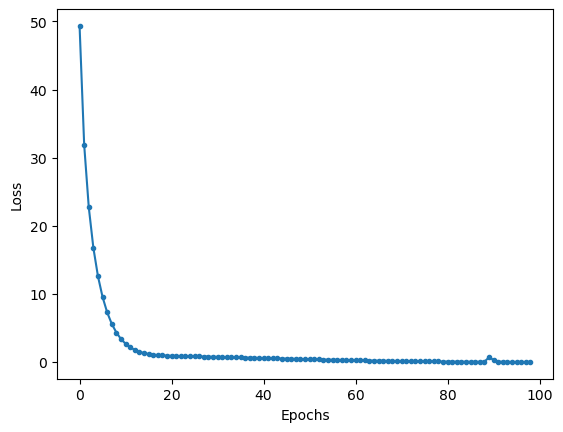

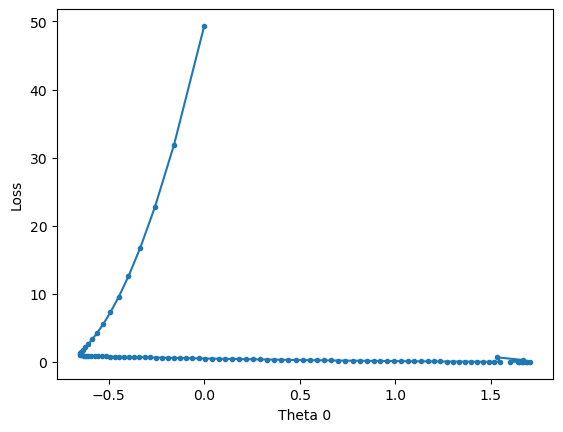

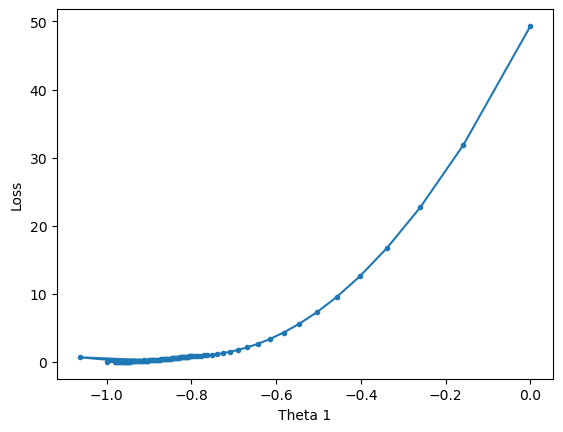

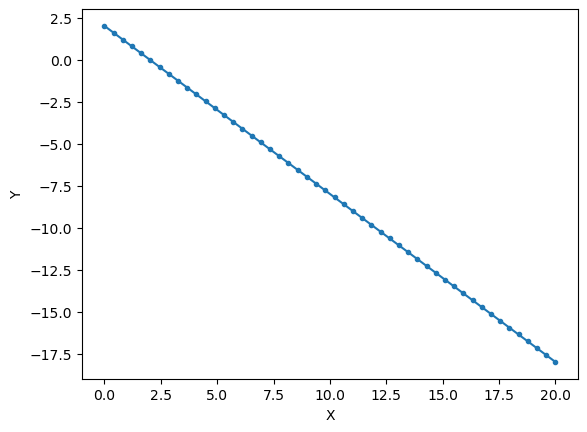

In [11]:
plotting(loss, thetas_0, thetas_1, X, y)

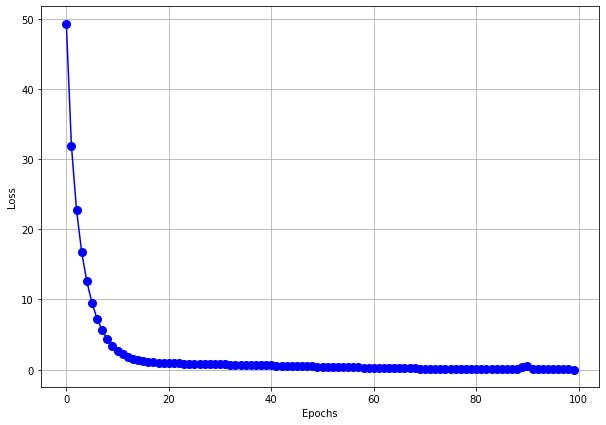

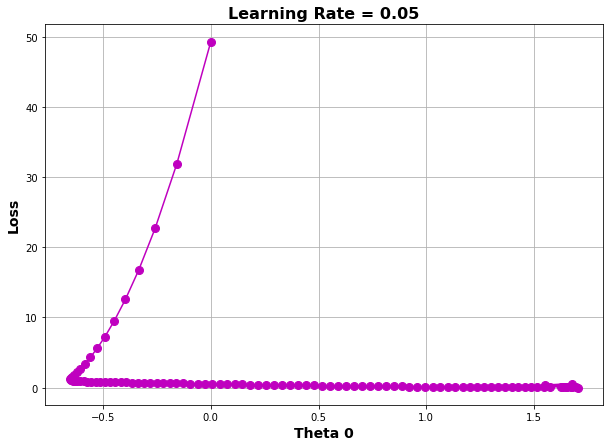

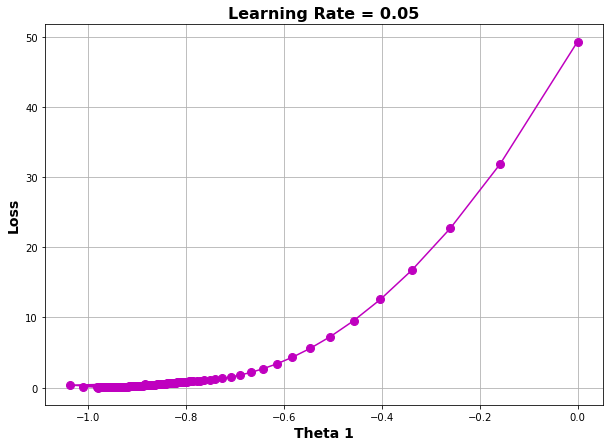

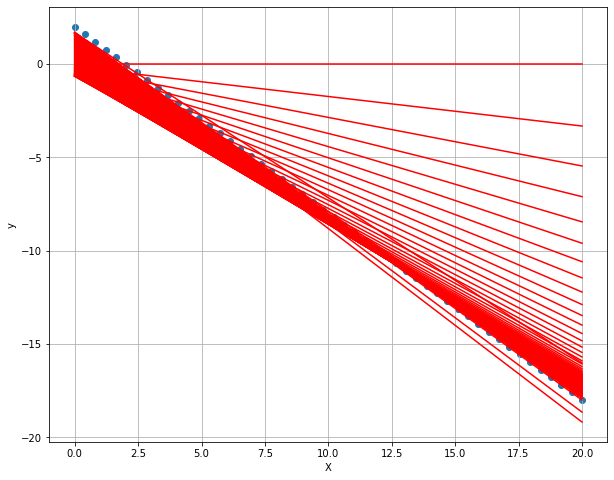

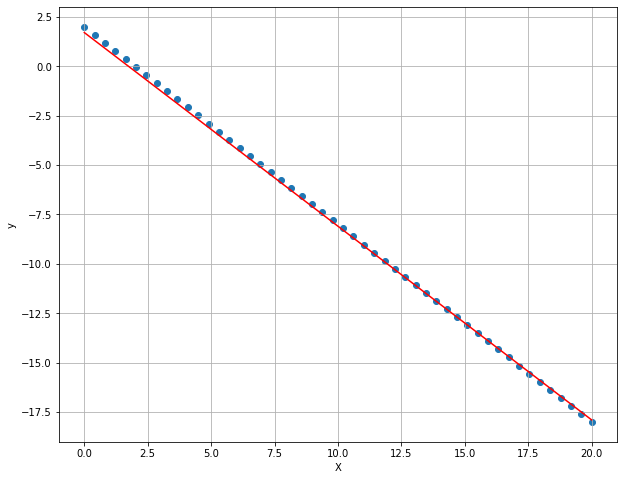

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [12]:
th0, th1, h, thetas_0, thetas_1, loss = rmsProp(X, y, alpha = 0.005, itr=5000, epsilon=0.00000001, beta=0.9)

******* Training Report *********

Gradient Descent converged after 541 iterations

Cost= 0.0882528614840716 

Gradient Vector [[-0.18563365]
 [ 0.36360095]] 

Gradient Vector Norm: 0.4082468662766218 

Optimal theta_0: 1.174502041697944
optimal theta_1: -0.9360135687439394


In [13]:
y_pred= th0 + th1*X

print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.9949124821026829


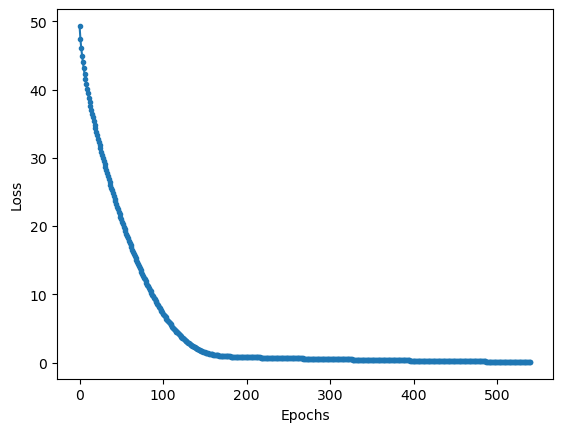

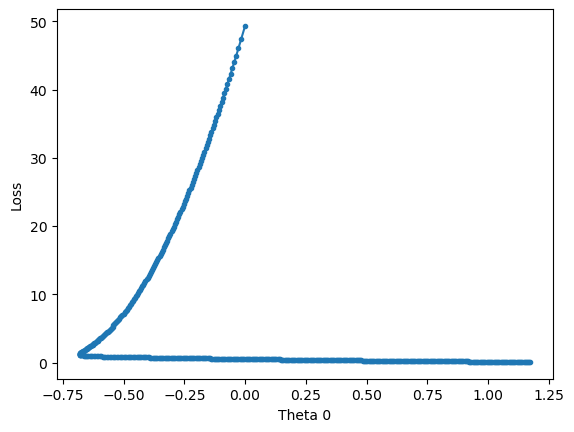

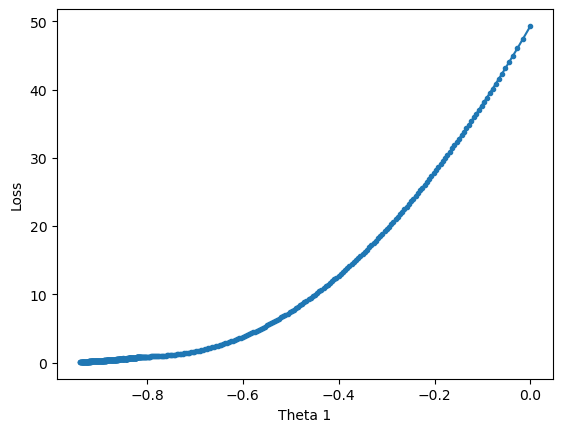

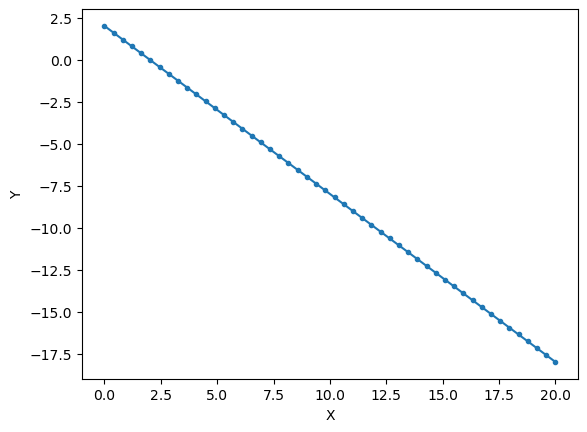

In [14]:
plotting(loss, thetas_0, thetas_1, X, y)

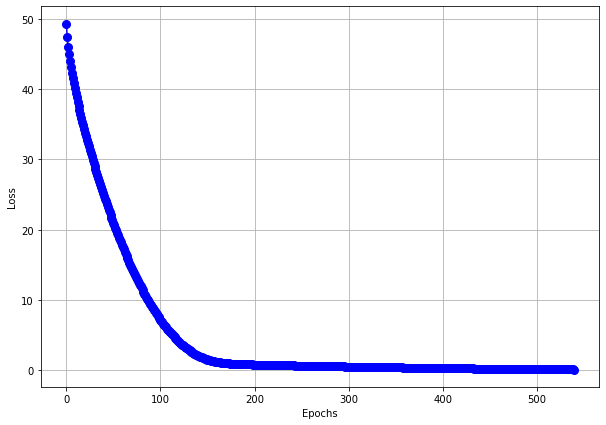

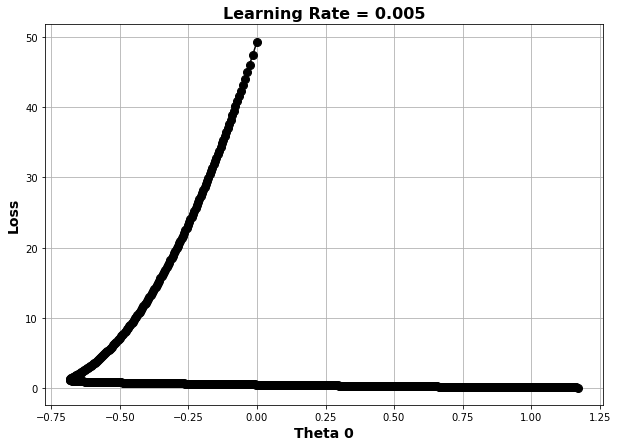

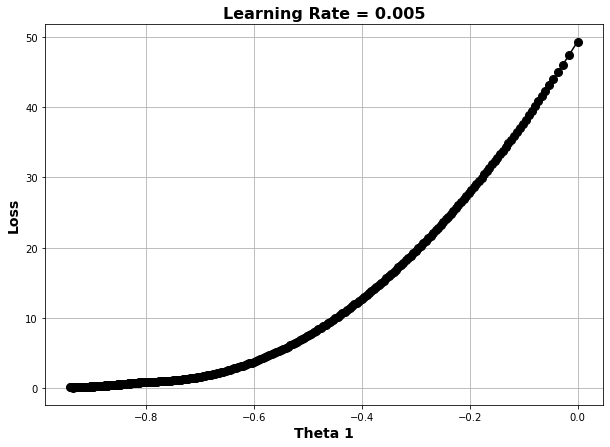

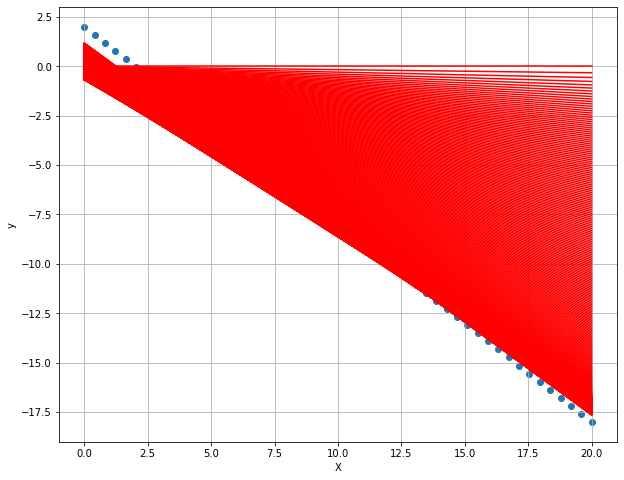

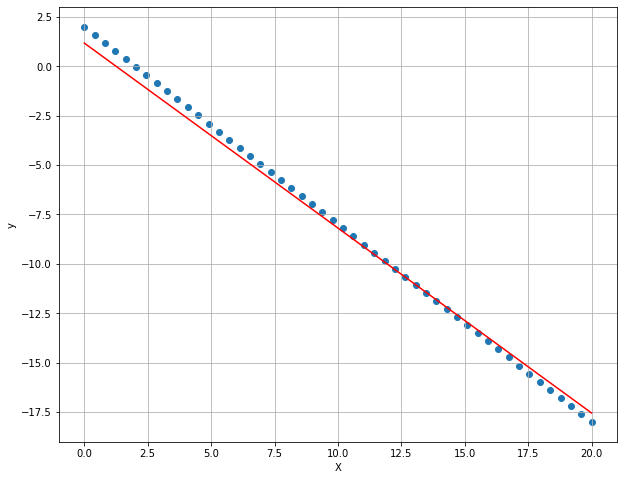

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [15]:
th0, th1, h, thetas_0, thetas_1, loss = rmsProp(X, y, alpha = 0.0005, itr=5000, epsilon=0.00000001, beta=0.9)

******* Training Report *********

Gradient Descent converged after 1609 iterations

Cost= 0.9074668434897152 

Gradient Vector [[-0.55000882]
 [ 1.74365753]] 

Gradient Vector Norm: 1.8283465978219327 

Optimal theta_0: -0.6379120081614356
optimal theta_1: -0.7912096813776165


In [16]:
y_pred= th0 + th1*X
print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.9476872054929458


r2 score =  0.9476184845511563


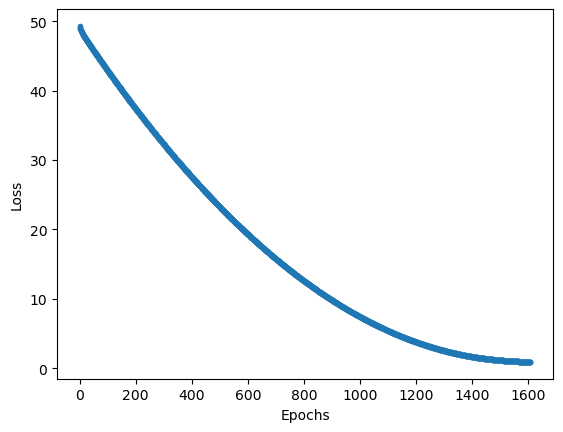

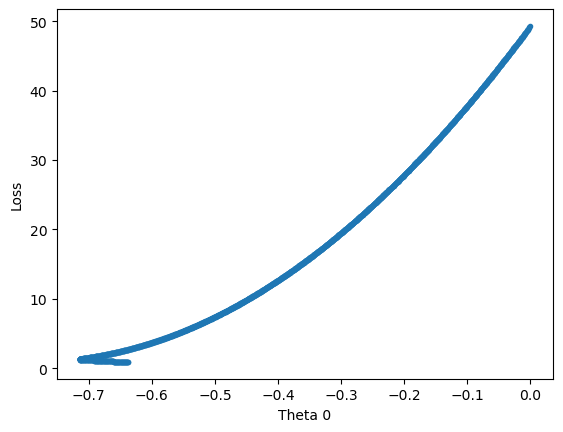

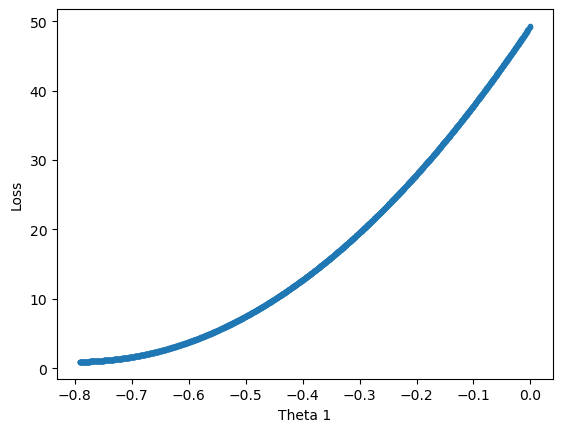

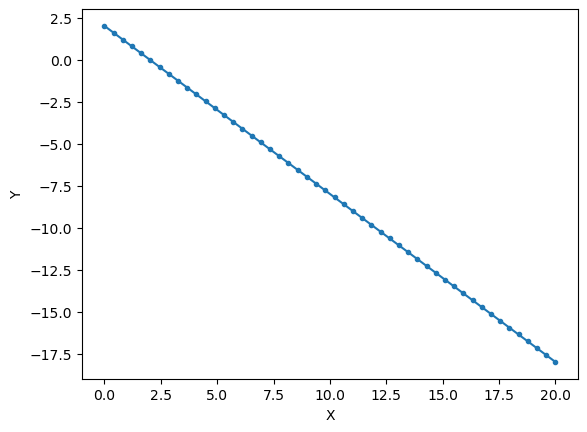

In [17]:
plotting(loss, thetas_0, thetas_1, X, y)

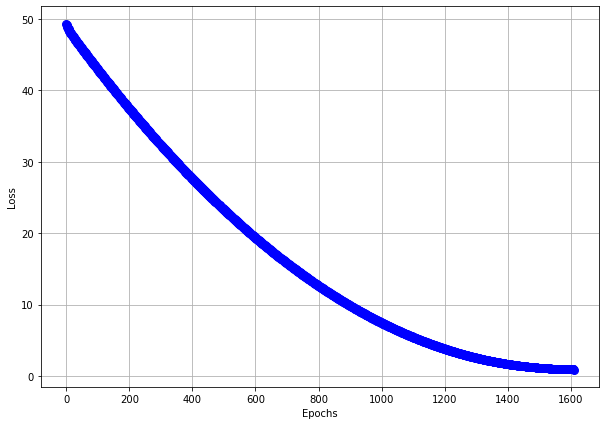

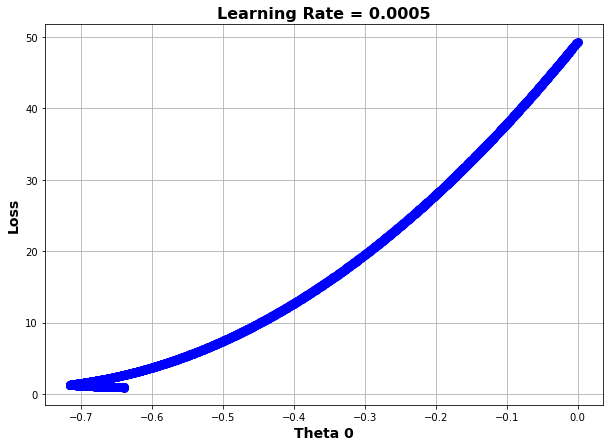

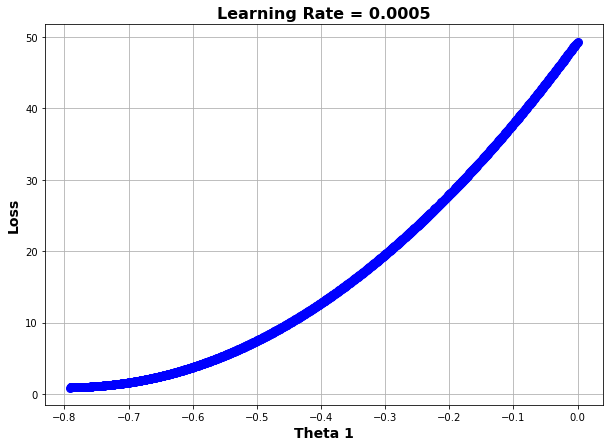

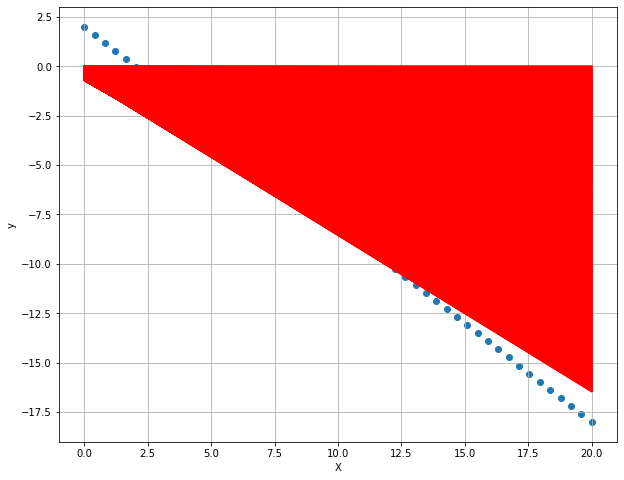

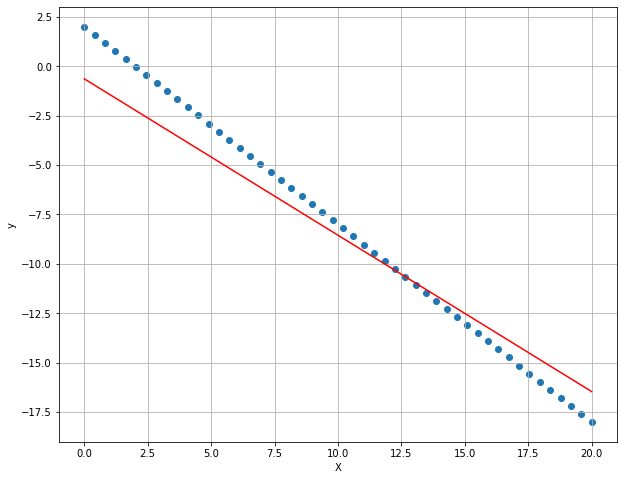

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [37]:
def adam(X, y, alpha, itr, epsilon, beta1, beta2):
    
    th0 = th1 = v0 = v1 = m0 = m1 = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    for i in range(itr):
        
        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e)
        
        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X)

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or norm < threshold):
            break

        else:
            
            m0 = beta1*m0 + (1-beta1)*j_theta_0
            v0 = beta2*v0 + (1-beta2)*(j_theta_0**2)
            
            m0_hat = m0/(1-(beta1**(i+1)))
            v0_hat = v0/(1-(beta2**(i+1)))
            
            th0 = th0 - (alpha*m0_hat/math.sqrt(v0_hat) + epsilon)
            
            m1 = beta1*m1 + (1-beta1)*j_theta_1
            v1 = beta2*v1 + (1-beta2)*(j_theta_1**2)

            m1_hat = m1/(1-(beta1**(i+1)))
            v1_hat = v1/(1-(beta2**(i+1)))
            
            th1 = th1 - (alpha*m1_hat/math.sqrt(v1_hat) + epsilon)
    
    
    print("******* Training Report *********\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('Cost=',j,'\n')
    print('Gradient Vector',gradient_vec,'\n')
    print('Gradient Vector Norm:',norm,'\n')
    print(f'Optimal theta_0: {th0}\nOptimal theta_1: {th1}')
            
    return th0, th1, h, thetas_0, thetas_1, loss
            

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [38]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.05, itr=500, epsilon=0.00000001, beta1=0.2, beta2=0.7)

******* Training Report *********

Gradient Descent converged after 83 iterations

Cost= 0.017910317620952625 

Gradient Vector [[0.00203973]
 [1.13512259]] 

Gradient Vector Norm: 1.1351244225618973 

Optimal theta_0: 1.680736572734695
Optimal theta_1: -0.967869683898961


In [39]:
y_pred= th0 + th1*X
print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.9989675228665569


r2 score =  0.9989675218213947


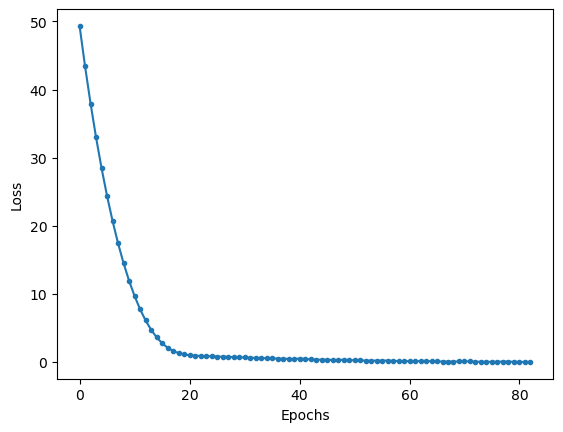

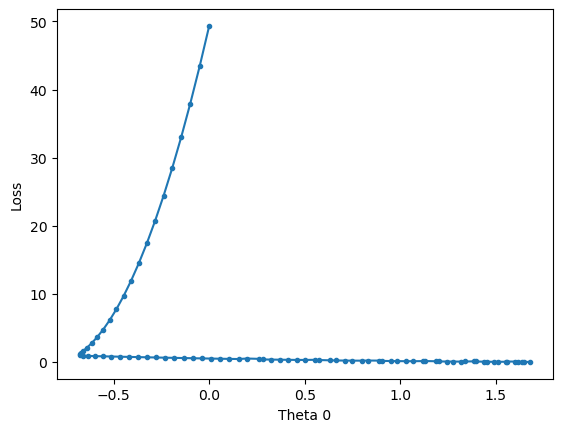

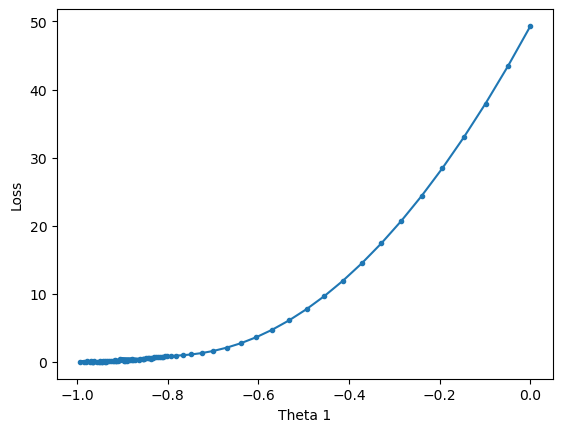

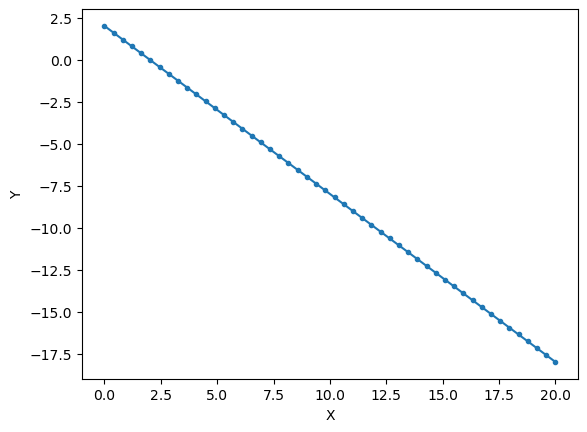

In [40]:
plotting(loss, thetas_0, thetas_1, X, y)

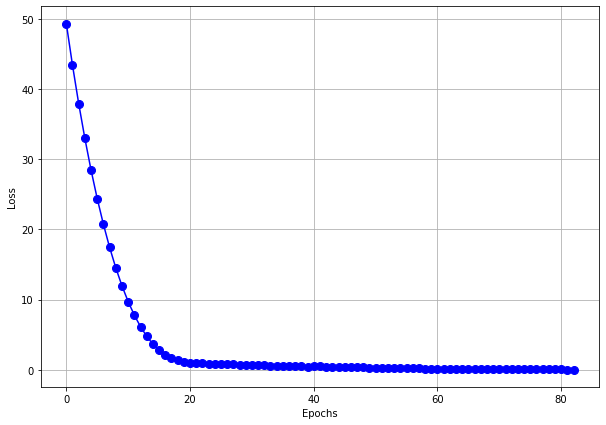

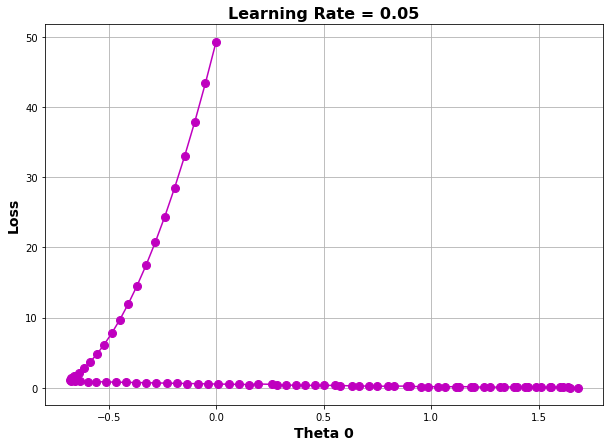

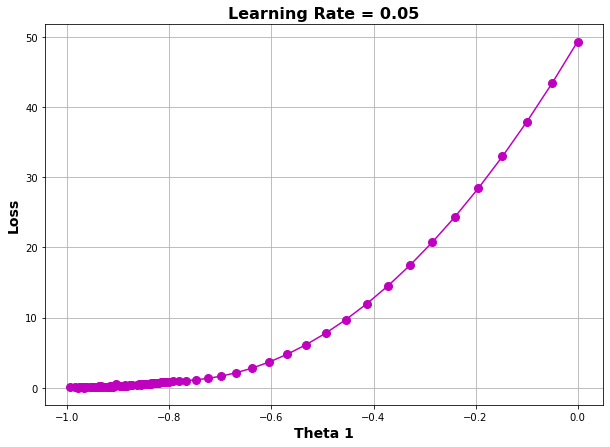

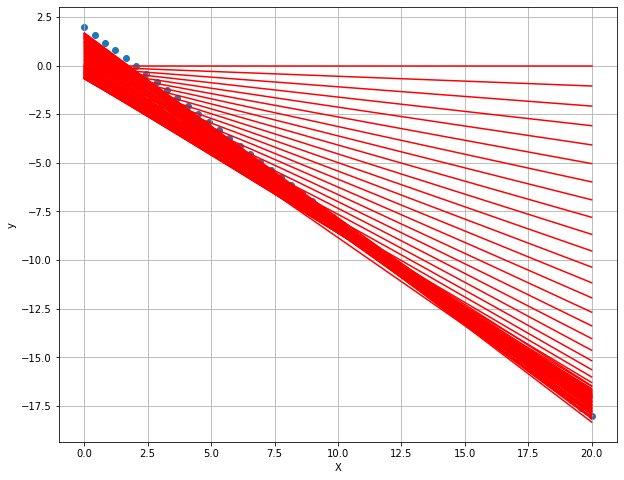

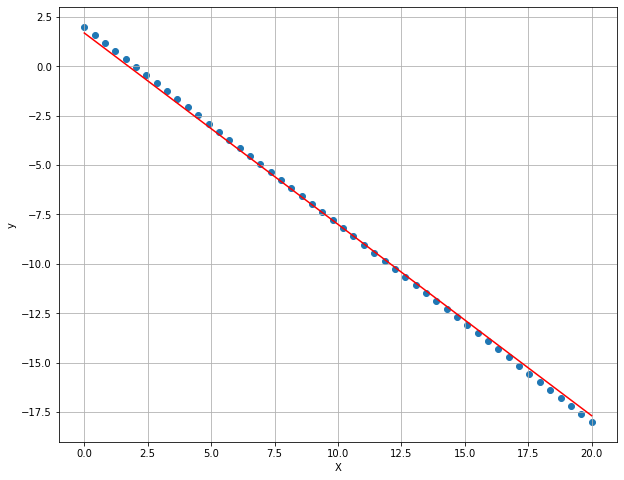

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [43]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.005, itr=500, epsilon=0.00000001, beta1=0.5, beta2=0.8)

******* Training Report *********

Gradient Descent converged after 500 iterations

Cost= 0.12792531163136914 

Gradient Vector [[-0.26849681]
 [-0.16002261]] 

Gradient Vector Norm: 0.31256643156945757 

Optimal theta_0: 1.0087093091028778
Optimal theta_1: -0.9246889728312858


In [44]:
y_pred= th0 + th1*X
print("r2 score = ", r2_score(y,y_pred))

r2 score =  0.9926930928969949


r2 score =  0.9926303749535054


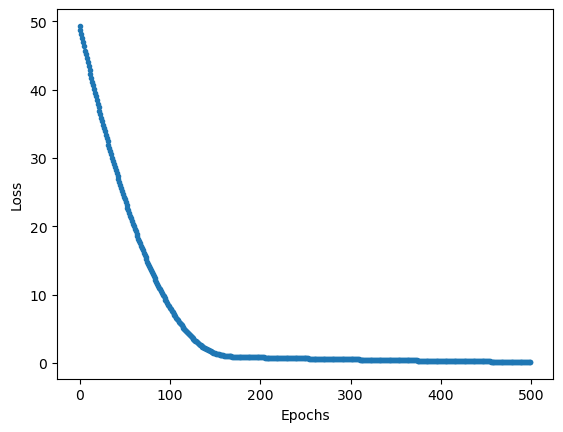

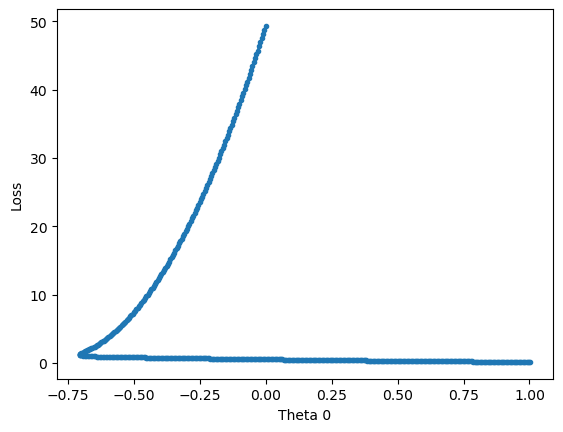

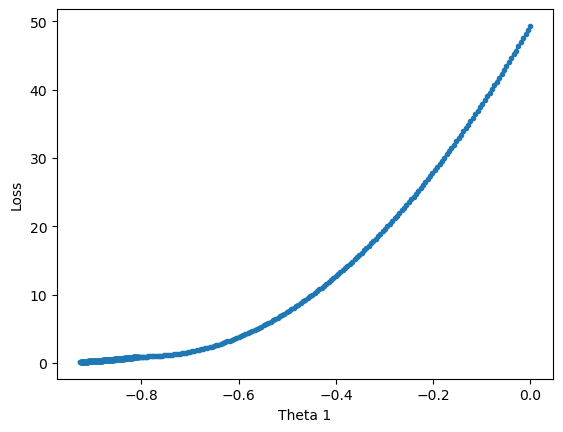

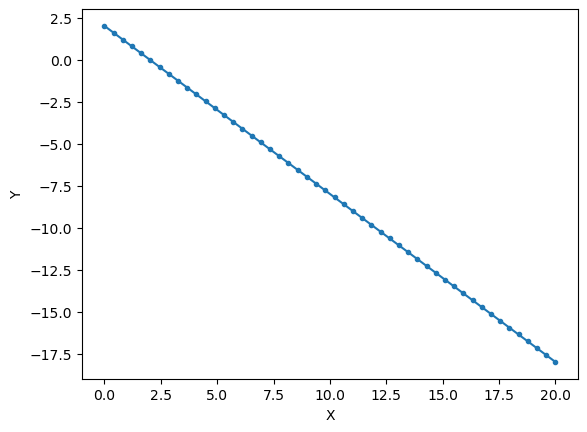

In [45]:
plotting(loss, thetas_0, thetas_1, X, y)

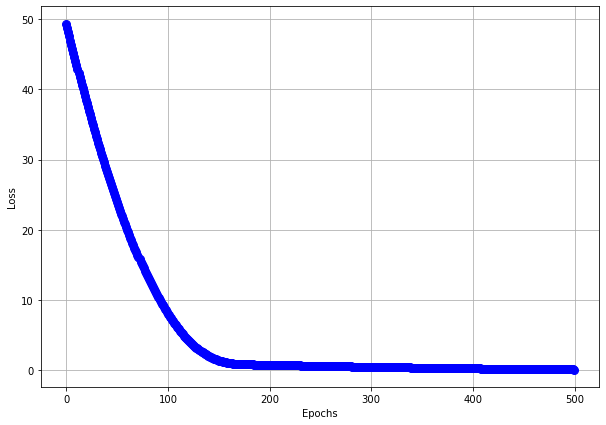

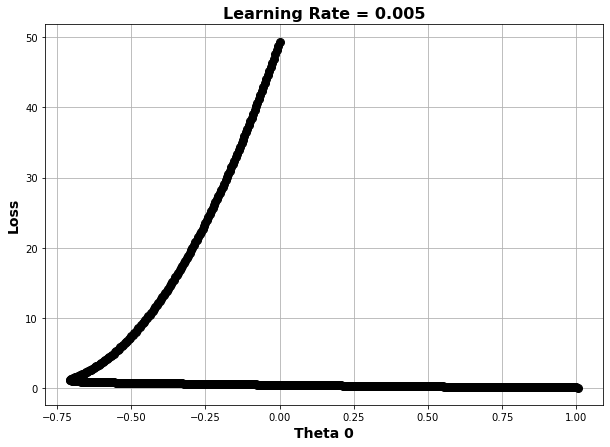

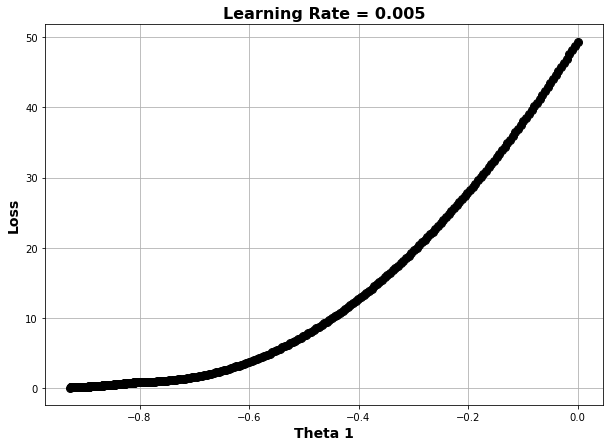

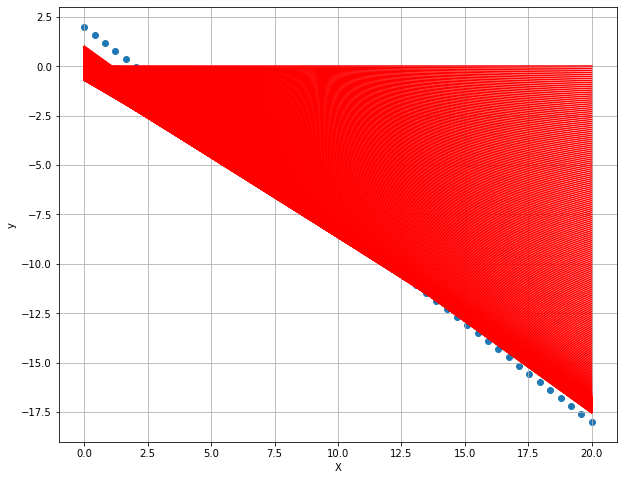

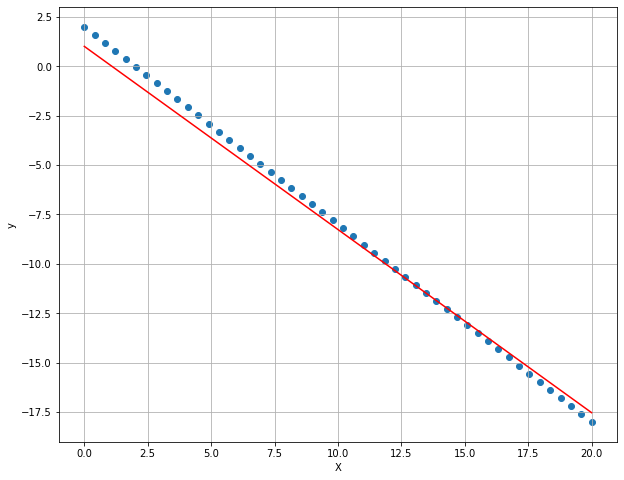

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [46]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.0005, itr=5000, epsilon=0.00000001, beta1=0.8, beta2=0.8)

******* Training Report *********

Gradient Descent converged after 1585 iterations

Cost= 0.9231634002488173 

Gradient Vector [[-0.58550045]
 [ 1.36737741]] 

Gradient Vector Norm: 1.4874581561783662 

Optimal theta_0: -0.6672458316425841
Optimal theta_1: -0.7918254620149147


In [49]:
y_pred = th0 + th1*X
print("r2 score: ", r2_score(y, y_pred))

r2 score:  0.946782345162127


r2 score =  0.9467806664066584


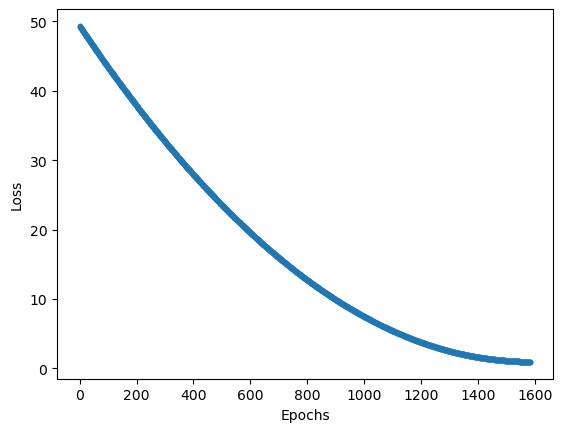

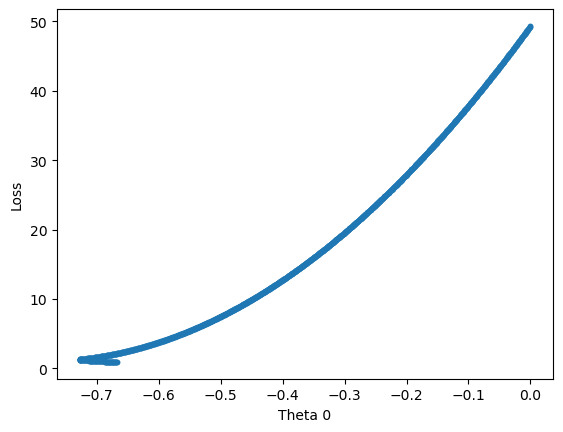

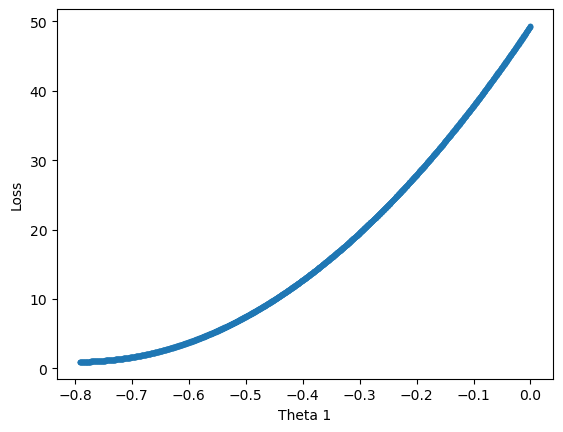

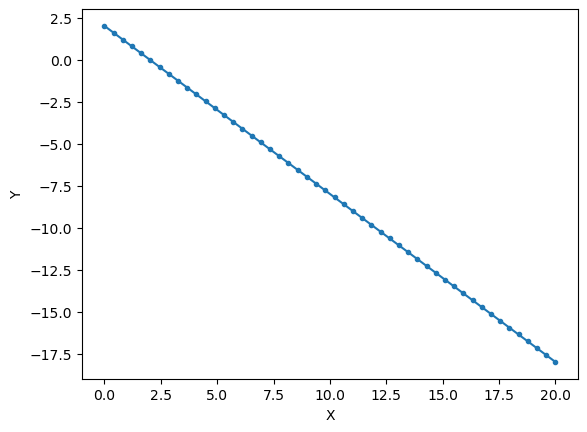

In [50]:
plotting(loss, thetas_0, thetas_1, X, y)

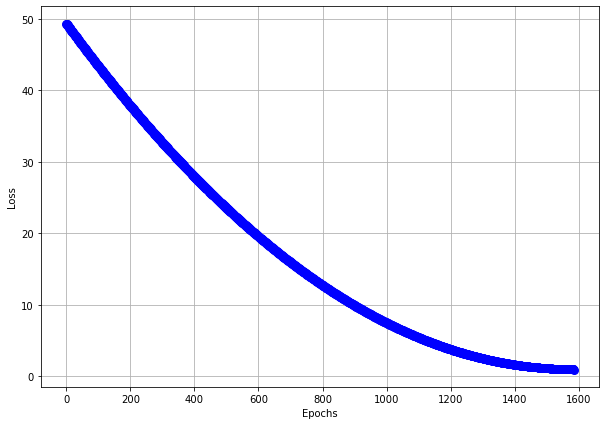

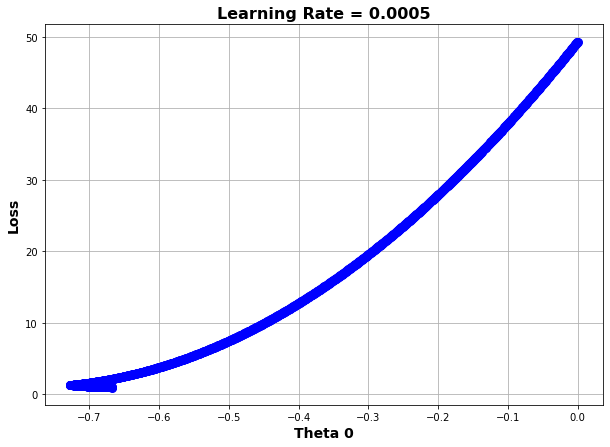

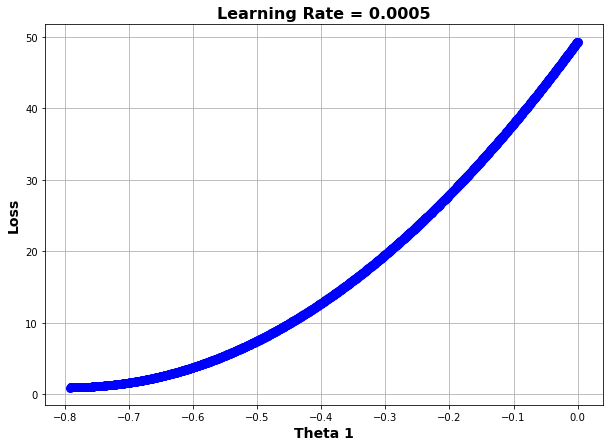

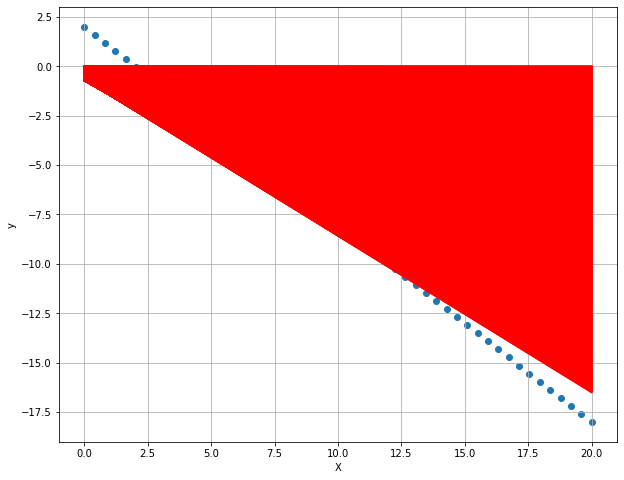

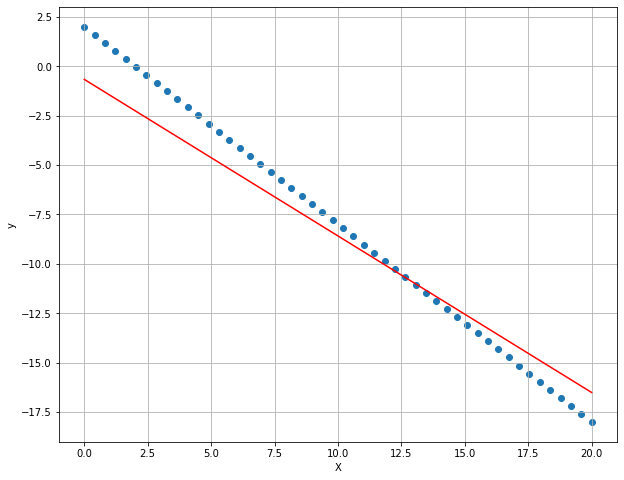

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [51]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.001, itr=5000, epsilon=0.00000001, beta1=0.9, beta2=0.9)

******* Training Report *********

Gradient Descent converged after 804 iterations

Cost= 0.9196577033756136 

Gradient Vector [[-0.66485864]
 [ 0.31395669]] 

Gradient Vector Norm: 0.7352590073001238 

Optimal theta_0: -0.6717092802926472
Optimal theta_1: -0.7993149356025193


In [52]:
y_pred = th0 + th1*X
print("r2 score: ", r2_score(y, y_pred))

r2 score:  0.9469844382759941


r2 score =  0.9485667803280174


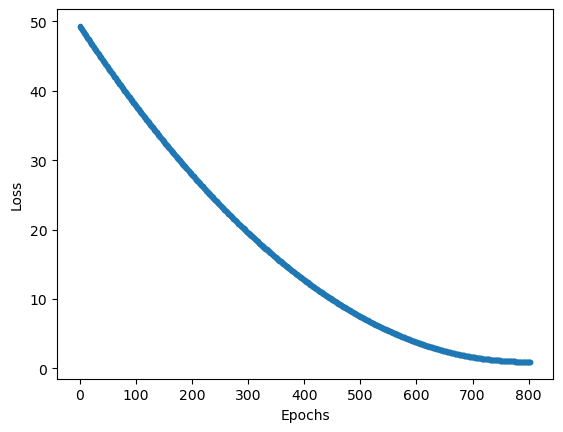

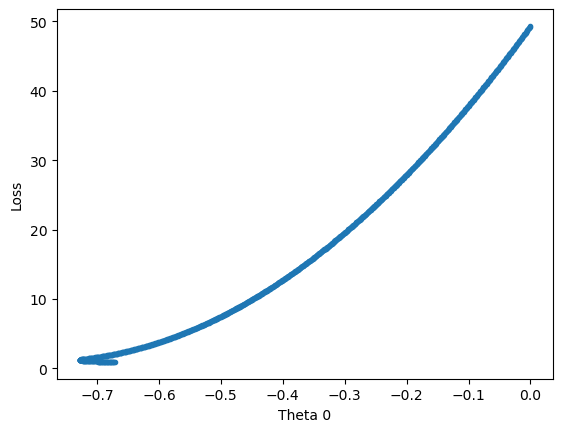

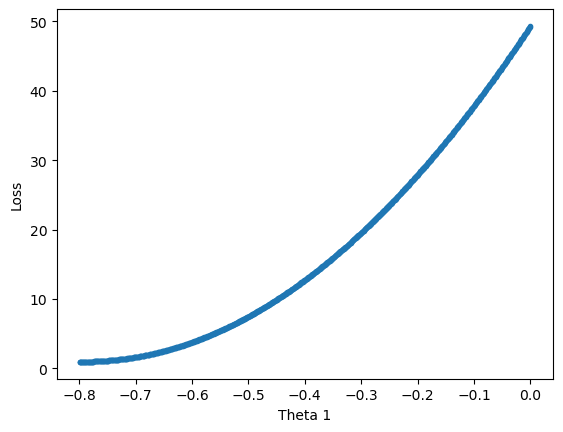

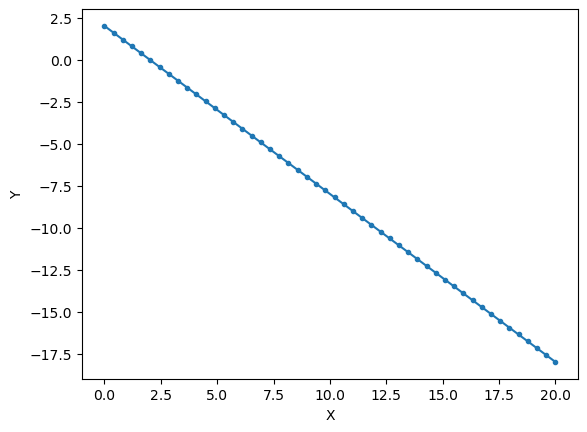

In [53]:
plotting(loss, thetas_0, thetas_1, X, y)

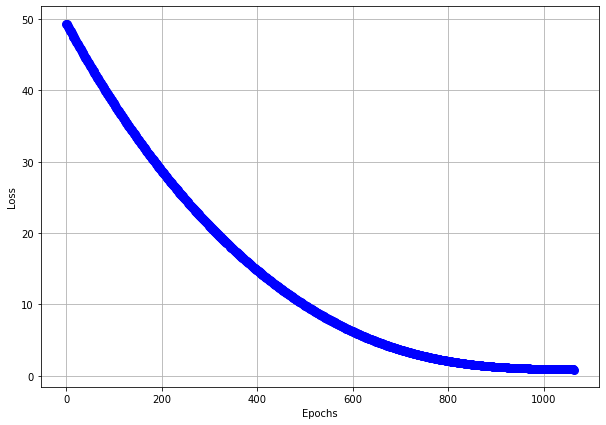

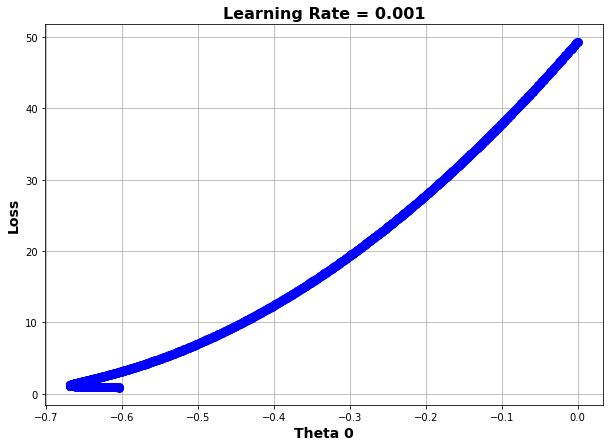

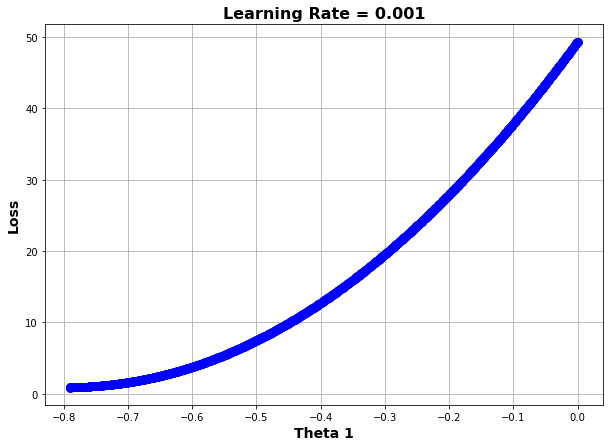

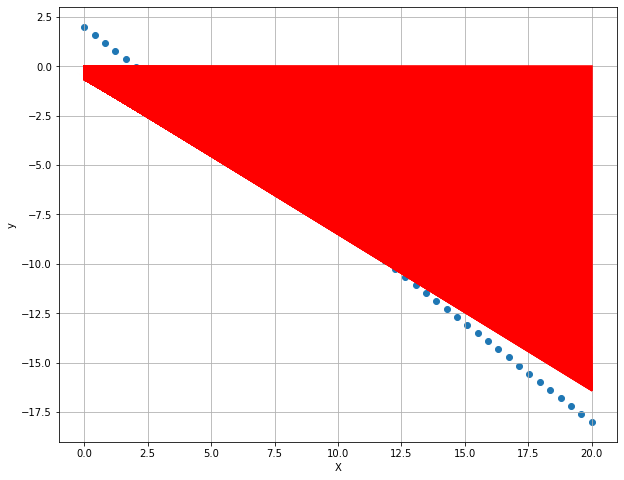

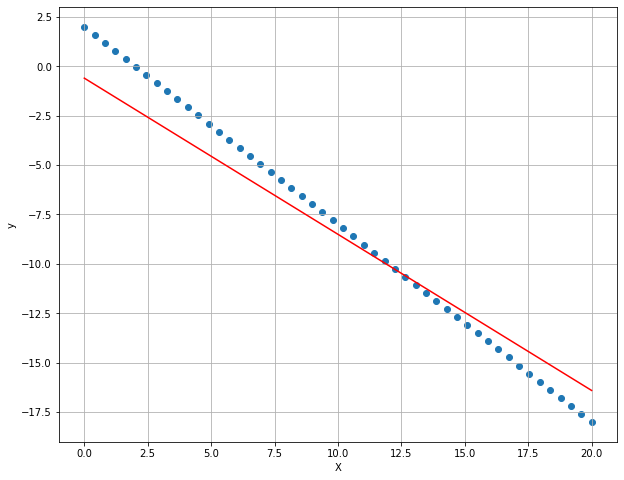

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [54]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.001, itr=5000, epsilon=0.00000001, beta1=0.9, beta2=0.5)

******* Training Report *********

Gradient Descent converged after 760 iterations

Cost= 0.967176254949936 

Gradient Vector [[-0.74513503]
 [-0.53418041]] 

Gradient Vector Norm: 0.9168287268570299 

Optimal theta_0: -0.7389075193011295
Optimal theta_1: -0.8006227508172284


In [55]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9442451335381802


r2 score =  0.944245878919177


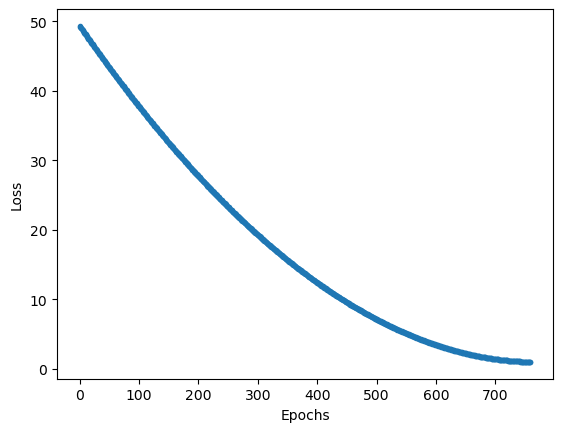

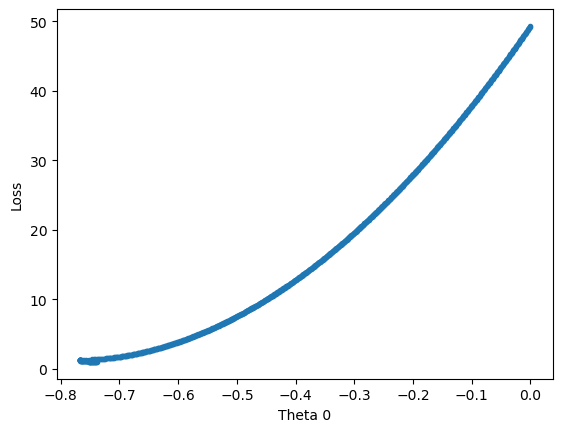

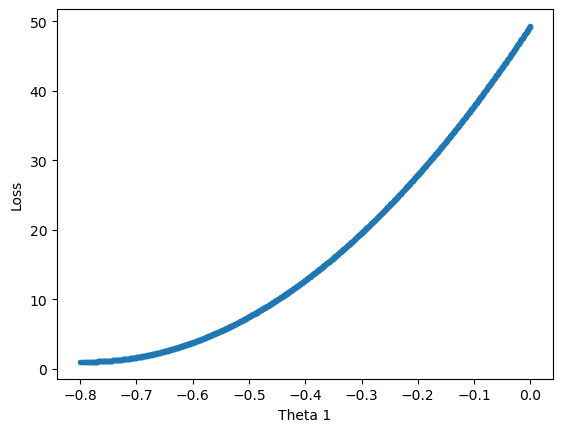

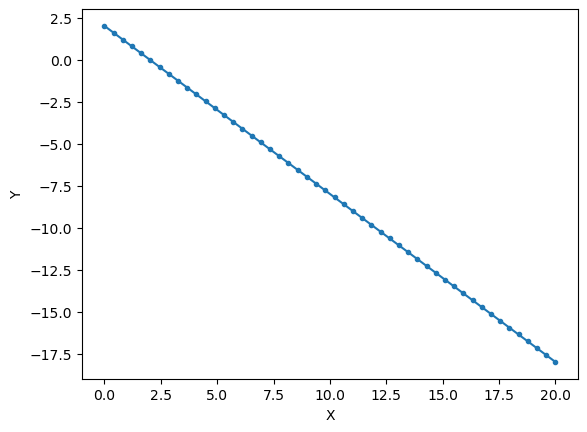

In [56]:
plotting(loss, thetas_0, thetas_1, X, y)

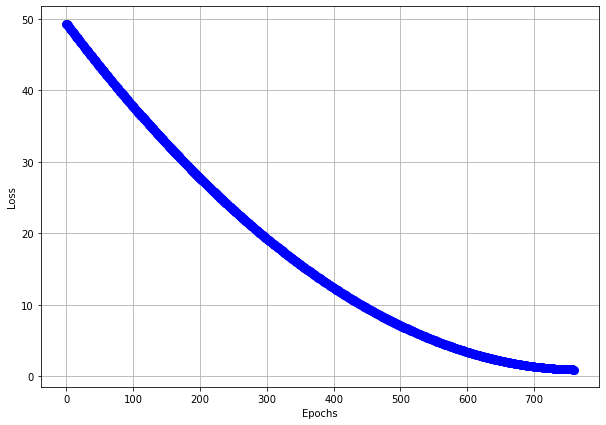

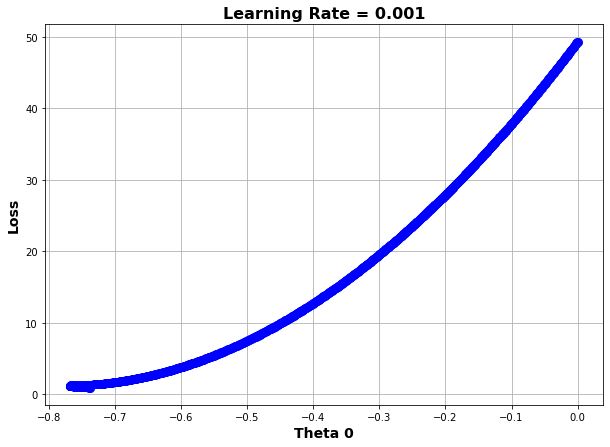

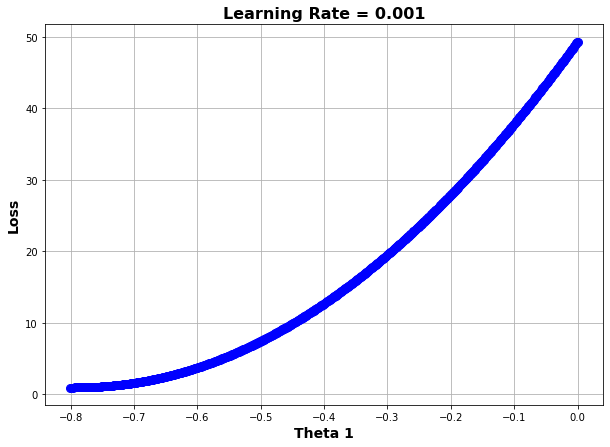

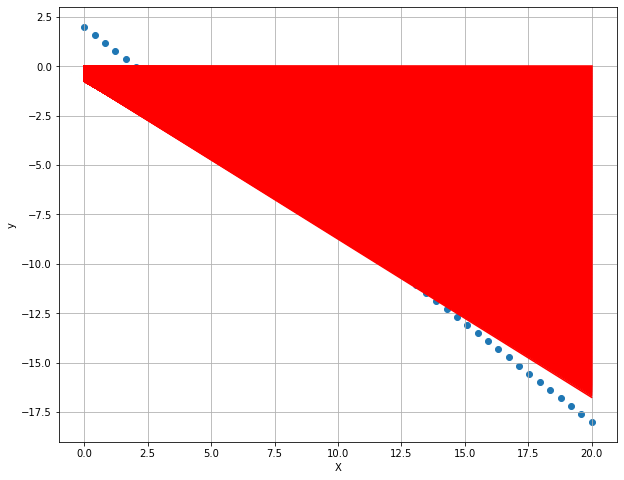

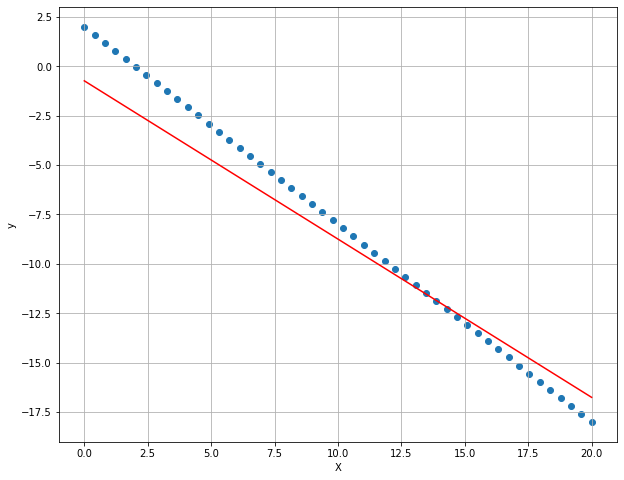

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [57]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.001, itr=5000, epsilon=0.00000001, beta1=0.5, beta2=0.99)

******* Training Report *********

Gradient Descent converged after 1091 iterations

Cost= 0.8787038218269178 

Gradient Vector [[-0.49881543]
 [ 2.24640619]] 

Gradient Vector Norm: 2.3011209437357643 

Optimal theta_0: -0.5840710869940069
Optimal theta_1: -0.7914744339530776


In [58]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9493453090946836


r2 score =  0.949344733641701


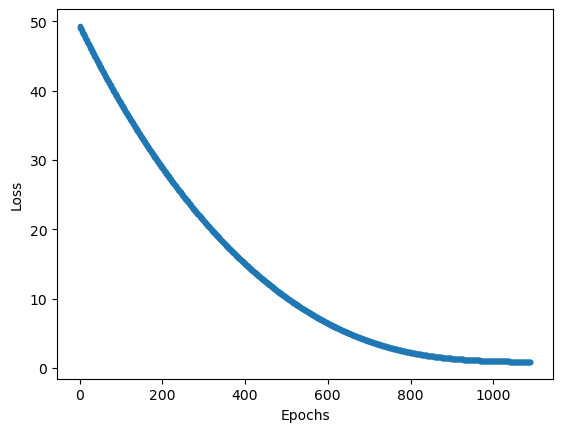

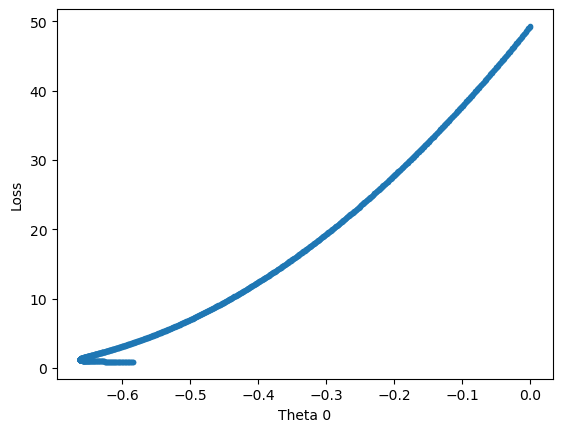

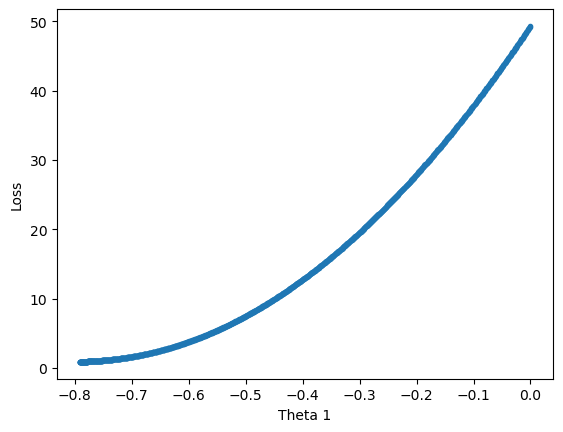

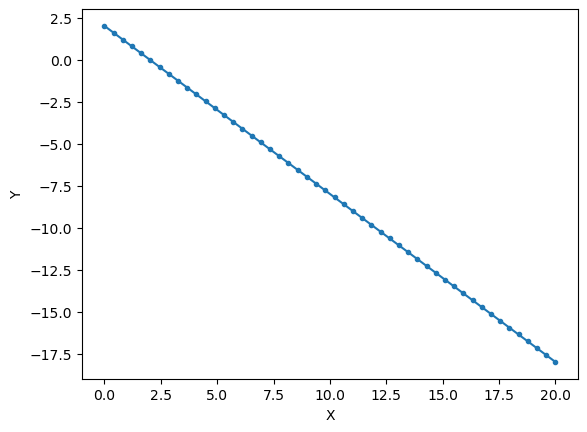

In [59]:
plotting(loss, thetas_0, thetas_1, X, y)

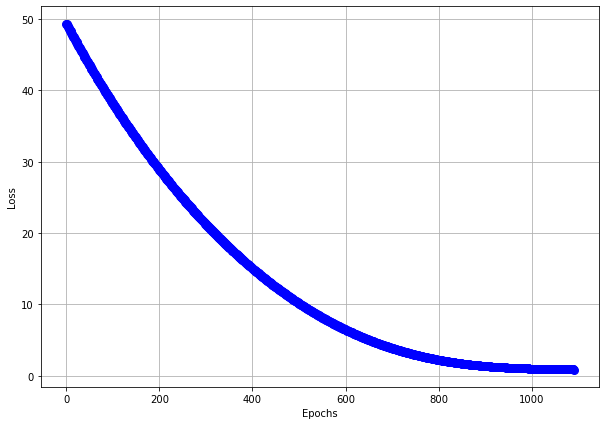

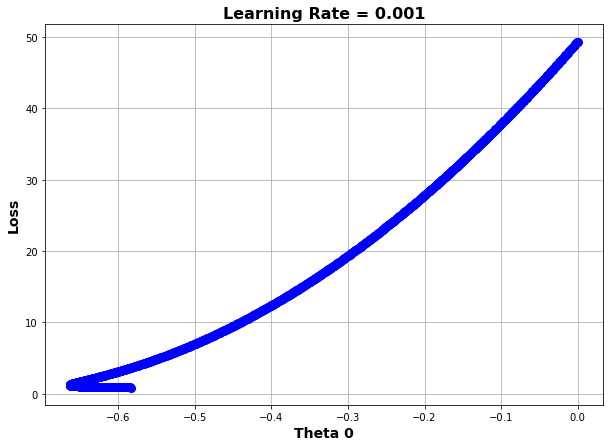

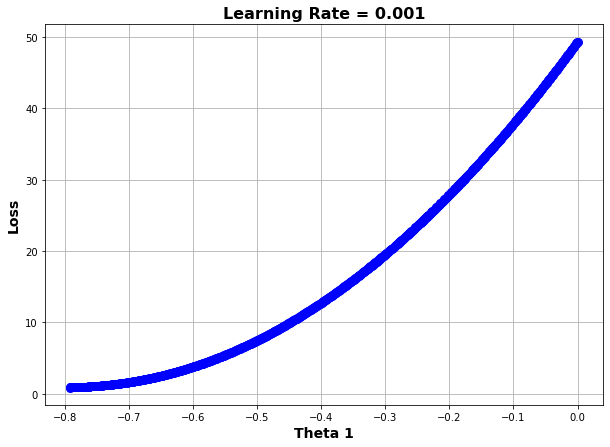

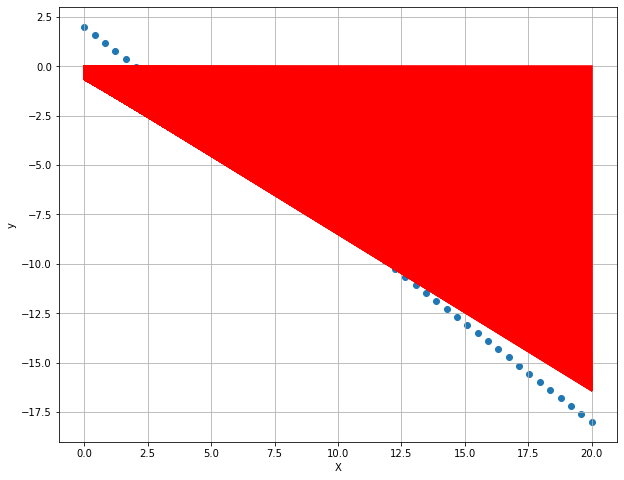

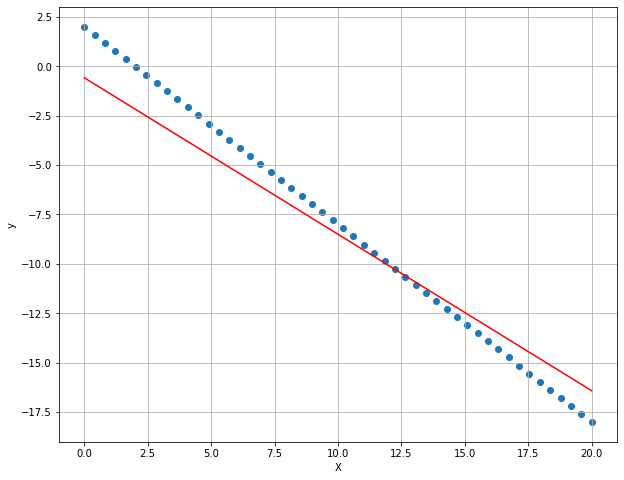

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [60]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.001, itr=5000, epsilon=0.00000001, beta1=0.5, beta2=0.5)

******* Training Report *********

Gradient Descent converged after 802 iterations

Cost= 0.9092419187876865 

Gradient Vector [[-0.66409338]
 [ 0.27206559]] 

Gradient Vector Norm: 0.7176626676644499 

Optimal theta_0: -0.6566638038689057
Optimal theta_1: -0.8007429579412493


In [61]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9475848776228275


r2 score =  0.9475845101116701


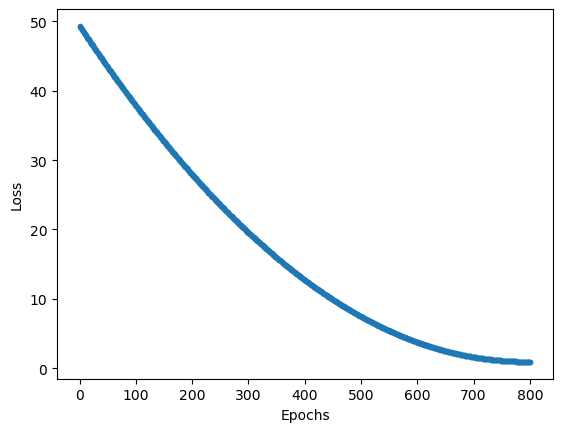

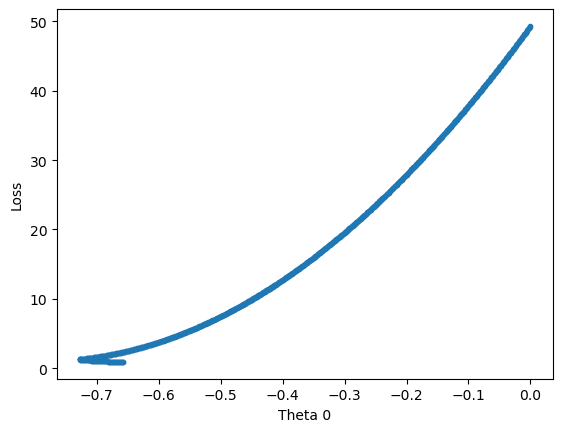

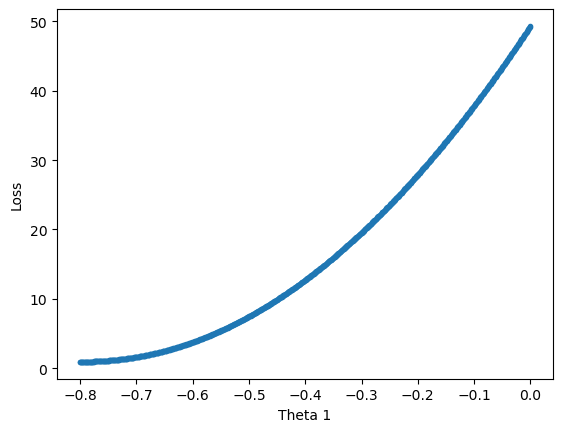

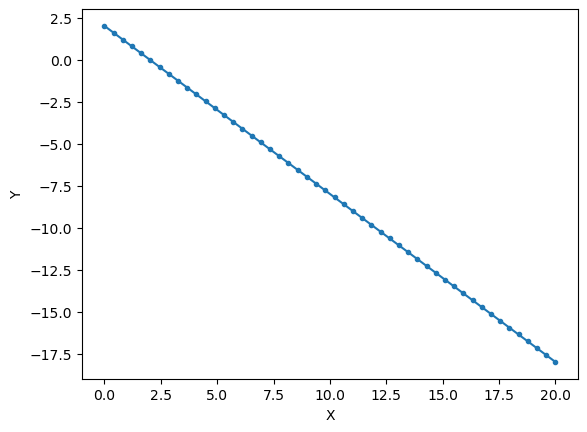

In [62]:
plotting(loss, thetas_0, thetas_1, X, y)

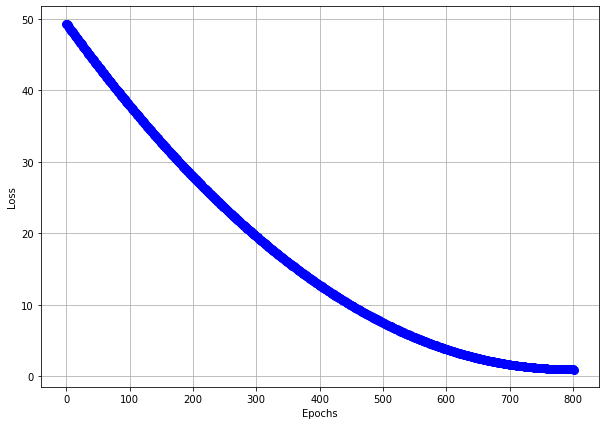

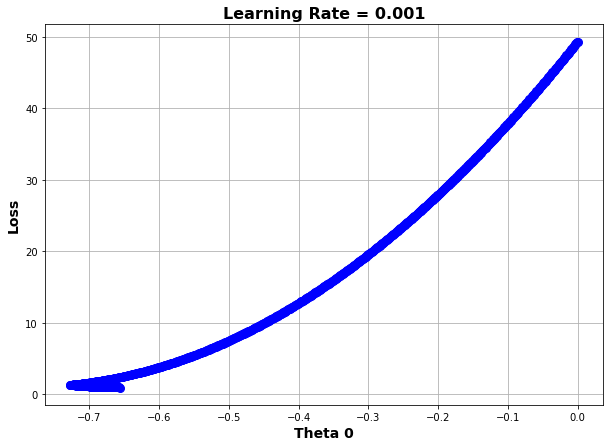

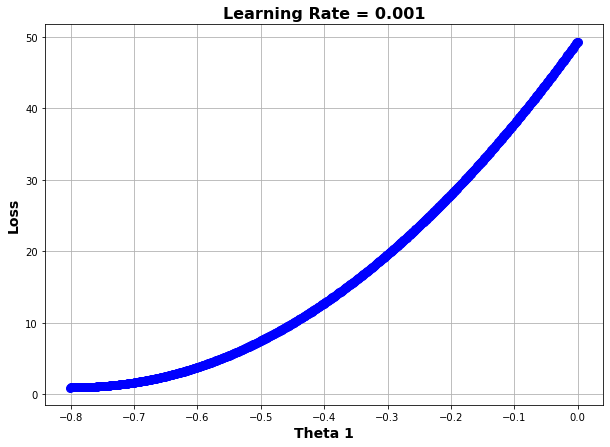

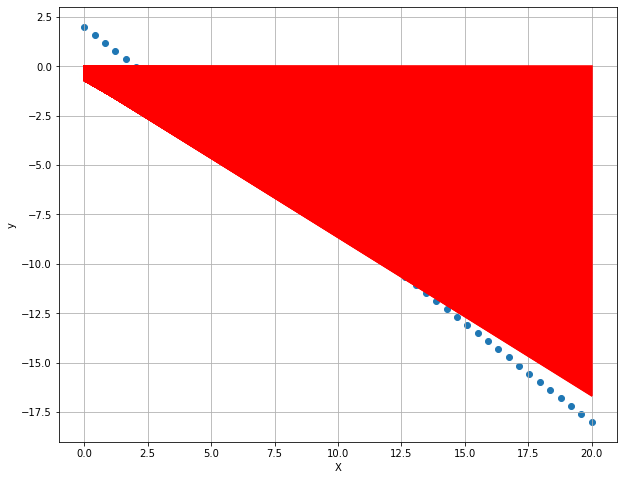

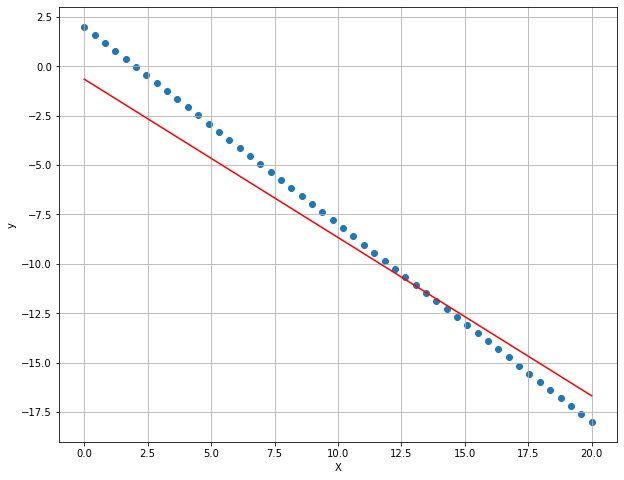

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [63]:
th0, th1, h, thetas_0, thetas_1, loss = adam(X, y, alpha=0.01, itr=5000, epsilon=0.00000001, beta1=0.9, beta2=0.99)

******* Training Report *********

Gradient Descent converged after 563 iterations

Cost= 0.08171727536607332 

Gradient Vector [[-0.19419871]
 [ 0.14649643]] 

Gradient Vector Norm: 0.24325776856186046 

Optimal theta_0: 1.2038266388094778
Optimal theta_1: -0.9398025345280469


In [64]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9952892394200734


r2 score =  0.9952892444628807


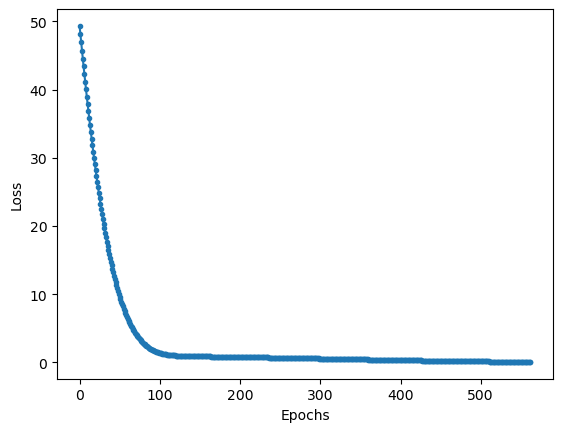

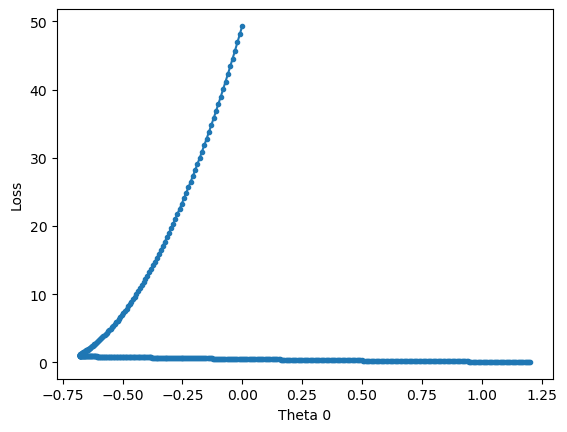

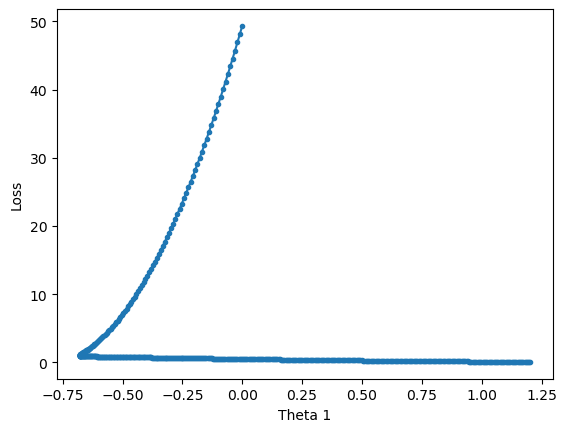

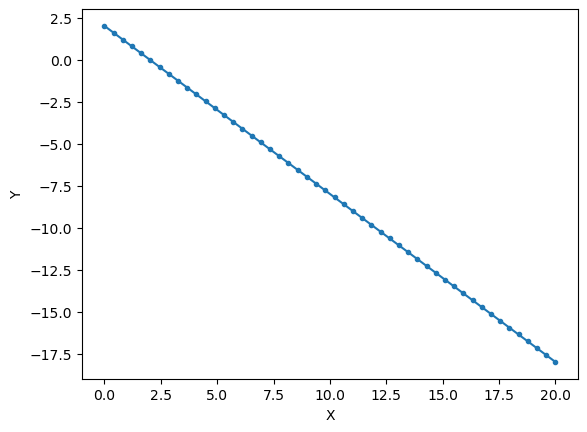

In [65]:
plotting(loss, thetas_0, thetas_0, X, y)

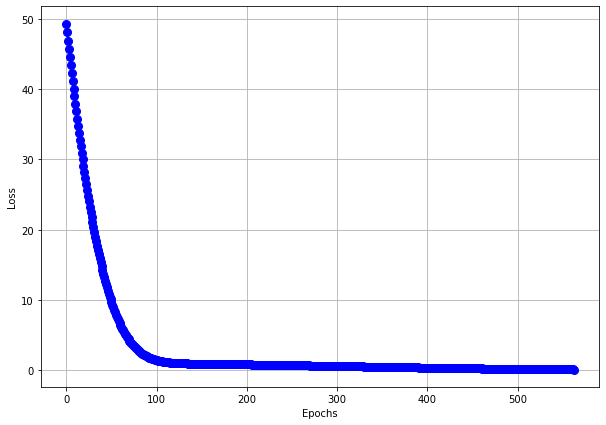

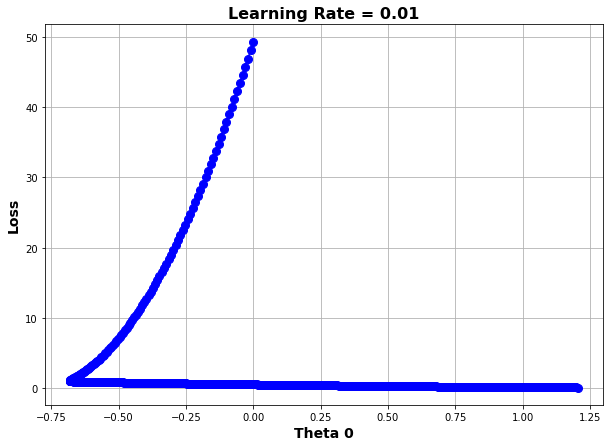

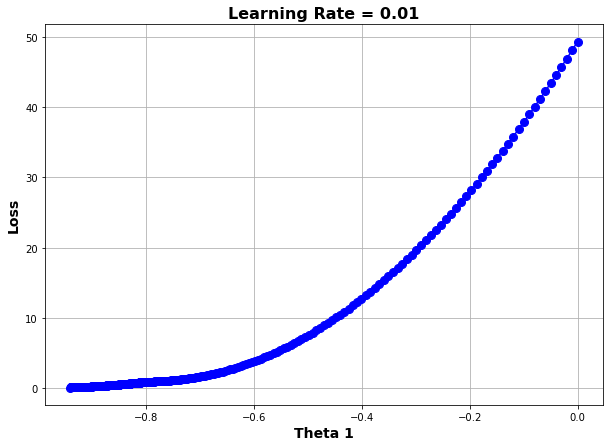

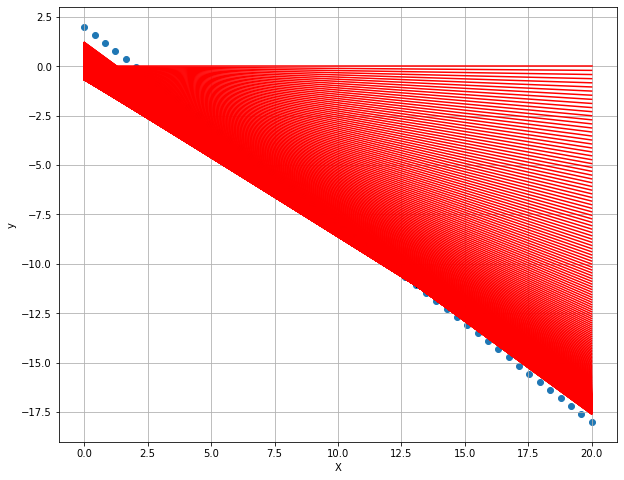

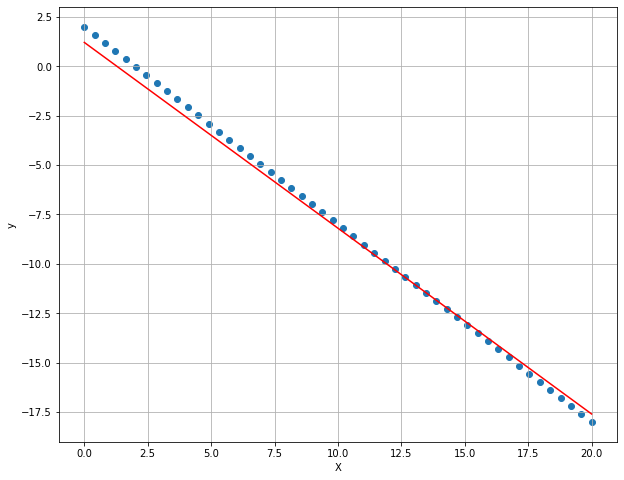

## Congratulations 
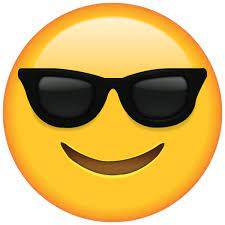